## Notebook to check to which cluster each point of the six 10years is associated

Now that I have found the centroids over the 60-year period, I check to which centroid each point from the two 10-year periods is assigned.

This allows me to compare how the frequency and nature of atmospheric regimes change between the two periods using a common basis (the global centroids).

In [1]:
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(".."))
import gc
import xarray as xr
import numpy as np
import pandas as pd
from utils.data_processing import prepare_data_matrix
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
import joblib
import matplotlib.pyplot as plt

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)

Combined matrix shape: (3652, 129042)

Combined matrix shape: (3652, 129042)


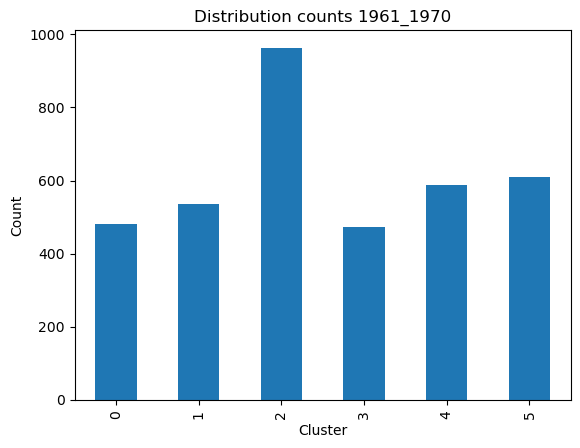

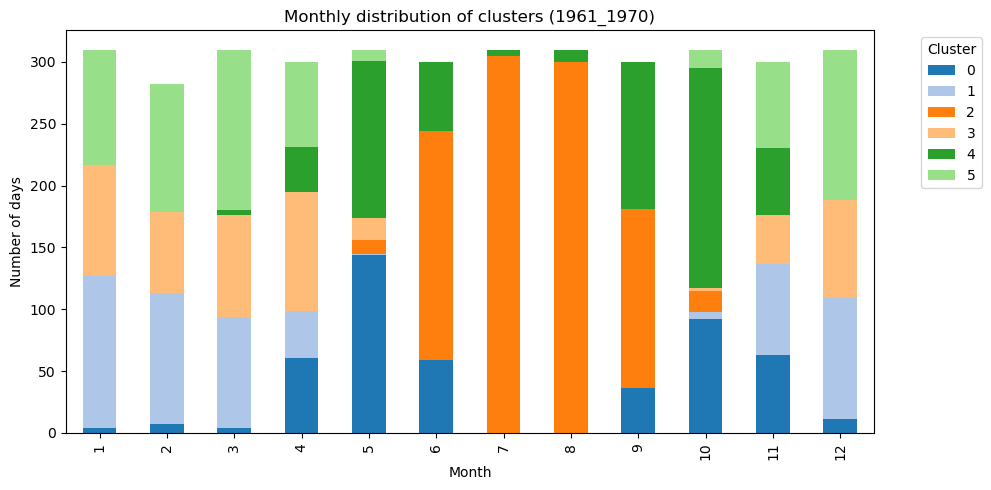

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)

Combined matrix shape: (3653, 129042)

Combined matrix shape: (3653, 129042)


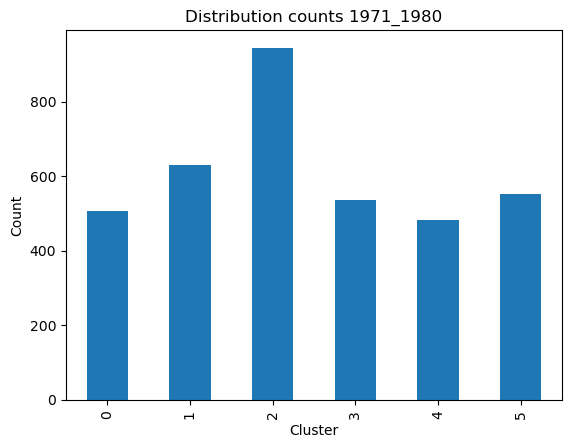

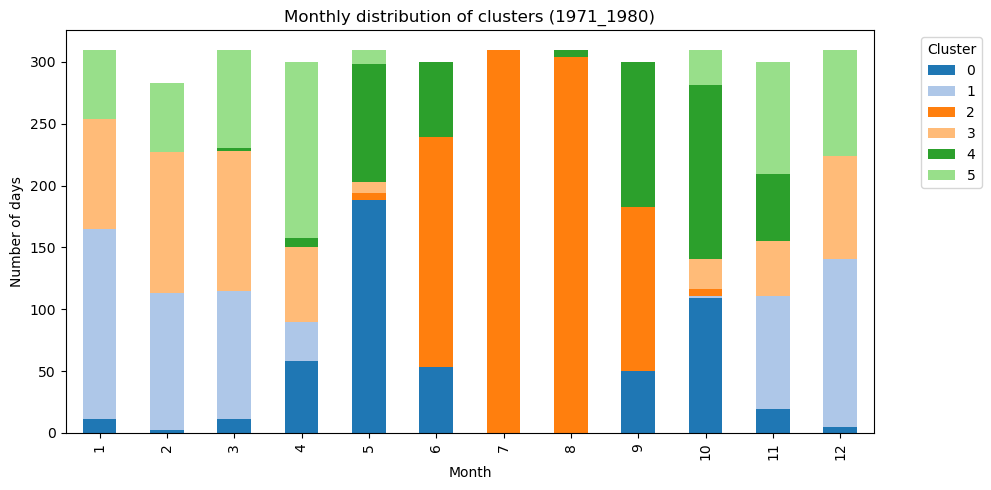

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)

Combined matrix shape: (3652, 129042)

Combined matrix shape: (3652, 129042)


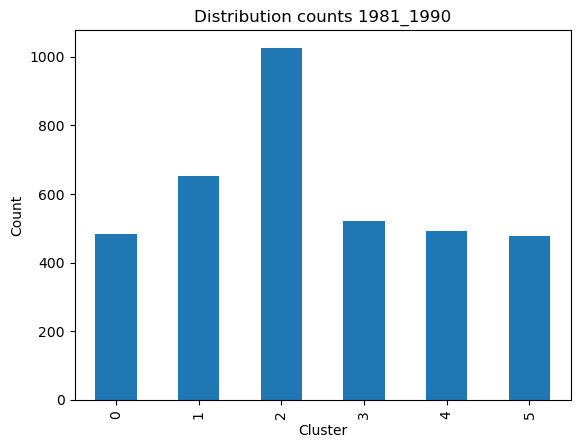

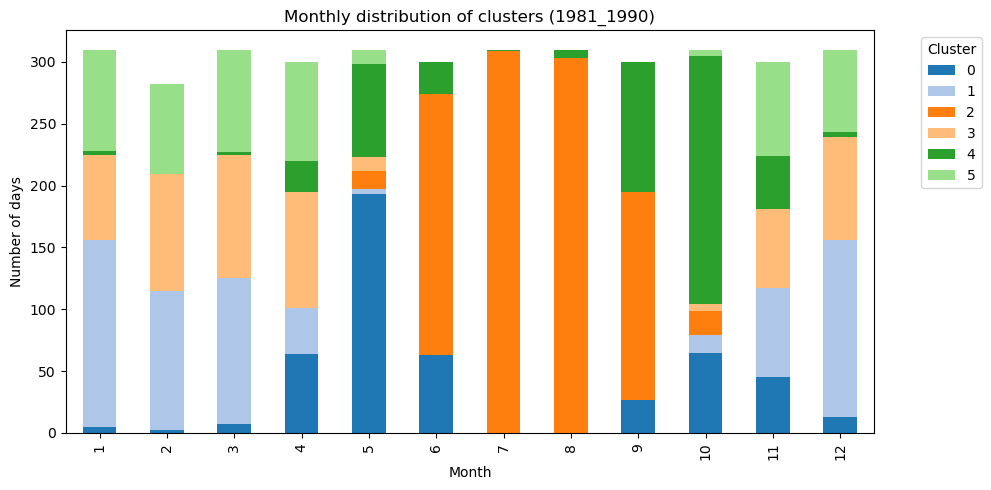

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)

Combined matrix shape: (3653, 129042)

Combined matrix shape: (3653, 129042)


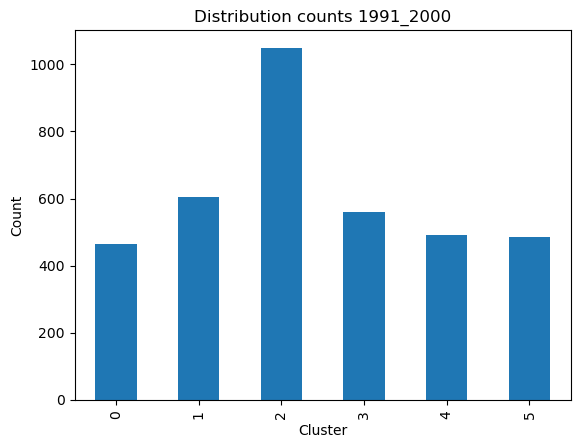

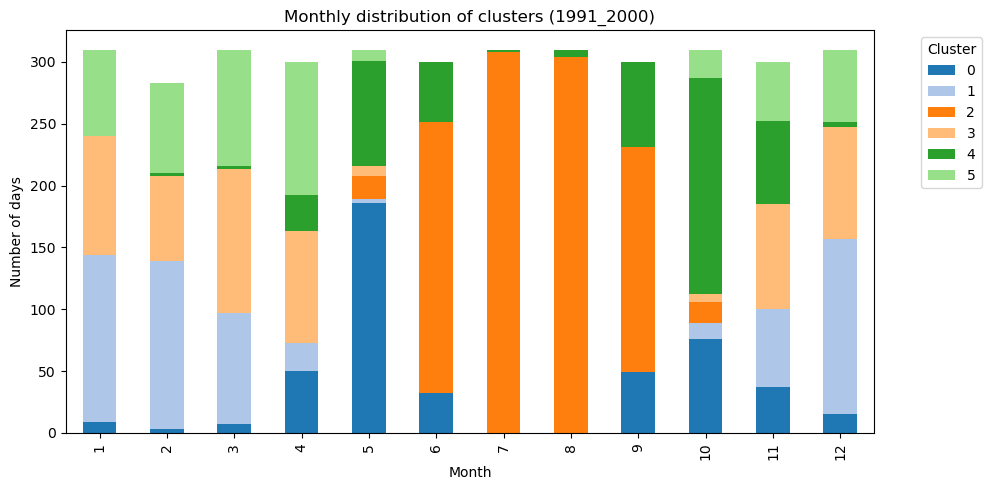

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3652, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)
     → z: ('time', 'latitude', 'longitude') → (3652, 64521)

Combined matrix shape: (3652, 129042)

Combined matrix shape: (3652, 129042)


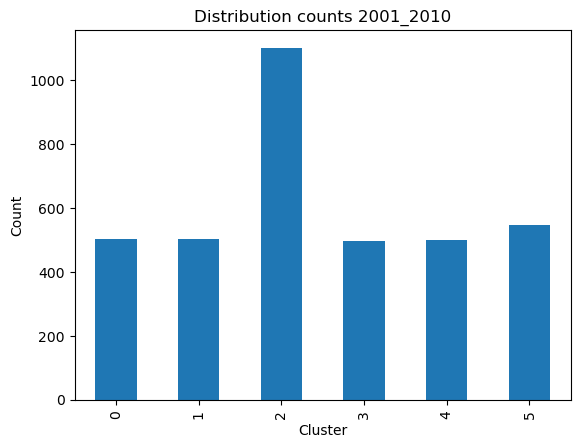

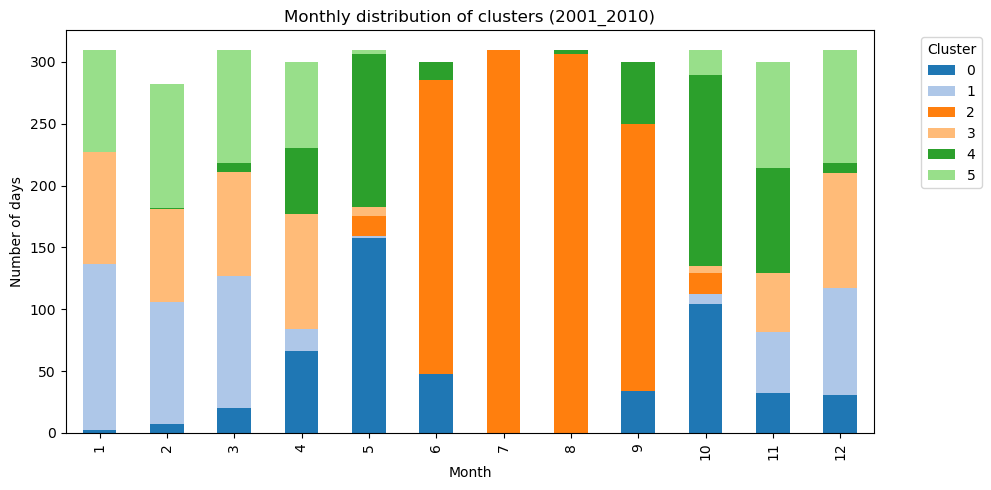

/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/eugenia/miniconda3/envs/grib_env/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead 

Processing t...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → t: ('time', 'latitude', 'longitude') → (3653, 64521)
Processing z...
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)
     → z: ('time', 'latitude', 'longitude') → (3653, 64521)

Combined matrix shape: (3653, 129042)

Combined matrix shape: (3653, 129042)


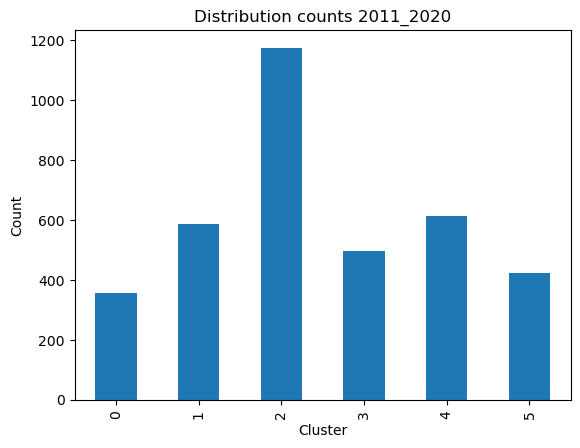

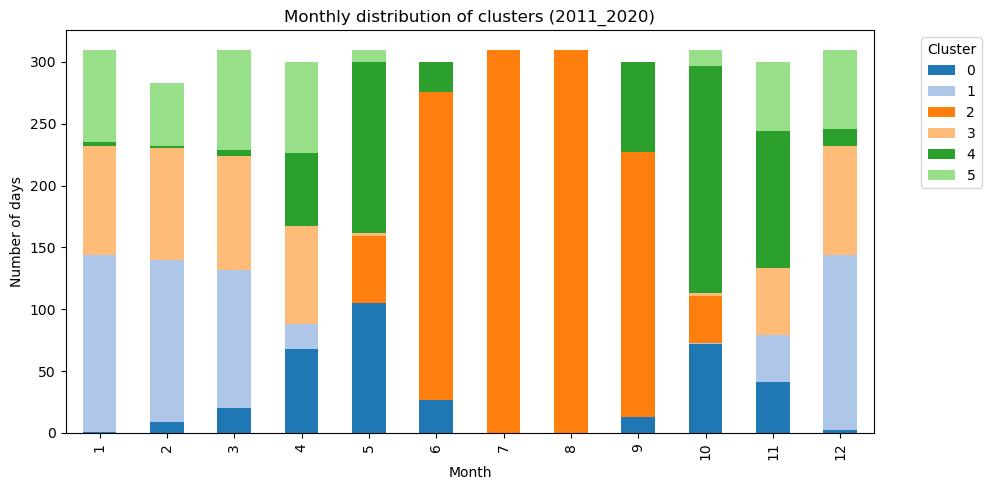

In [2]:


def process_period(grib_path, date_save_path, label_save_path, global_mean, global_std,
    centroids, ipca_path, period_name
):
    # Carica dataset
    ds_t = xr.open_dataset(grib_path, engine='cfgrib', filter_by_keys={'shortName': 't'})
    t_850 = ds_t['t']
    t_850 = t_850.reset_coords('isobaricInhPa', drop=True) 

    ds_z = xr.open_dataset(grib_path, engine='cfgrib', filter_by_keys={'shortName': 'z'})
    z_500 = ds_z['z']
    z_500 = z_500.reset_coords('isobaricInhPa', drop=True) 

    ds_filtered = xr.Dataset({
        't': t_850,
        'z': z_500
    })
    # Estrai date e salva
    dates = pd.to_datetime(ds_filtered.time.values)
    np.save(date_save_path, dates)

    # Prepara matrice
    X_matrix, _ = prepare_data_matrix(ds_filtered)

    gc.collect()

    # Standardizza
    X_std = (X_matrix - global_mean) / global_std
    X_std = X_std.astype(np.float32)
    del X_matrix
    gc.collect()

    # PCA
    ipca = joblib.load(ipca_path)
    X_pca = ipca.transform(X_std)
    del X_std
    gc.collect()

    # Assegna cluster
    distances = cdist(X_pca, centroids)
    labels = np.argmin(distances, axis=1)
    np.save(label_save_path, labels)

    # Plot distribuzione cluster
    pd.Series(labels).value_counts().sort_index().plot(kind='bar')
    plt.xlabel("Cluster")
    plt.ylabel("Count")
    plt.title(f"Distribution counts {period_name}")
    plt.show()

    # Plot distribuzione mensile
    months = dates.month
    df = pd.DataFrame({'cluster': labels, 'month': months})
    pivot = pd.crosstab(df['month'], df['cluster'])
    colors = plt.get_cmap('tab20').colors[:len(pivot.columns)]
    ax = pivot.plot(kind='bar', stacked=True, color=colors, figsize=(10,5))
    plt.xlabel("Month")
    plt.ylabel("Number of days")
    plt.title(f"Monthly distribution of clusters ({period_name})")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return labels, dates


# Load the parameters
global_mean = np.load("Mid_result_to_save/global_mean_60y.npy")
global_std = np.load("Mid_result_to_save/global_std_60y.npy")
centroids = np.load("Mid_result_to_save/centroids_k6_60y.npy")   ### CHANGE WHEN CHANGING K

# Define the periods to process
periods = [
    {
        "grib_path": "10y/era5_1961_1970_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_1961_1970.npy",
        "label_save_path": "Mid_result_to_save/labels_1961_1970.npy",
        "period_name": "1961_1970"
    },
    {
        "grib_path": "10y/era5_1971_1980_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_1971_1980.npy",
        "label_save_path": "Mid_result_to_save/labels_1971_1980.npy",
        "period_name": "1971_1980"
    },
    {
        "grib_path": "10y/era5_1981_1990_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_1981_1990.npy",
        "label_save_path": "Mid_result_to_save/labels_1981_1990.npy",
        "period_name": "1981_1990"
    },
    {
        "grib_path": "10y/era5_1991_2000_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_1991_2000.npy",
        "label_save_path": "Mid_result_to_save/labels_1991_2000.npy",
        "period_name": "1991_2000"
    },
    {
        "grib_path": "10y/era5_2001_2010_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_2001_2010.npy",
        "label_save_path": "Mid_result_to_save/labels_2001_2010.npy",
        "period_name": "2001_2010"
    },
    {
        "grib_path": "10y/era5_2011_2020_t850_z500.grib",
        "date_save_path": "Mid_result_to_save/dates_2011_2020.npy",
        "label_save_path": "Mid_result_to_save/labels_2011_2020.npy",
        "period_name": "2011_2020"
    }
]

# Save results for all periods
results = []
for period in periods:
    labels, dates = process_period(
        grib_path=period["grib_path"],
        date_save_path=period["date_save_path"],
        label_save_path=period["label_save_path"],
        global_mean=global_mean,
        global_std=global_std,
        centroids=centroids,
        ipca_path='Mid_result_to_save/ipca_60y.pkl',
        period_name=period["period_name"]
    )
    results.append({"labels": labels, "dates": dates, "period": period["period_name"]})


### Analysis and comparing between the two periods

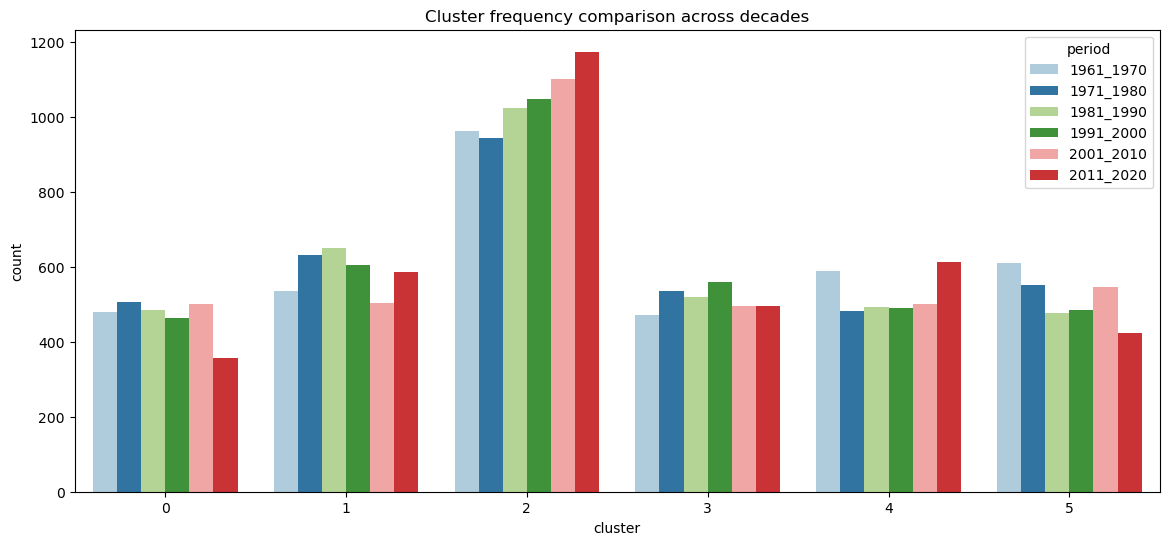

In [3]:
#Compare cluster distributions across decades
period_names = [p['period_name'] for p in periods]
dfs = []

for period in period_names:
    labels = np.load(f"Mid_result_to_save/labels_{period}.npy")
    dates = np.load(f"Mid_result_to_save/dates_{period}.npy")  
    months = pd.to_datetime(dates).month
    years = pd.to_datetime(dates).year
    df = pd.DataFrame({
        'period': [period] * len(labels),
        'cluster': labels,
        'month': months,
        'year': years
    })
    dfs.append(df)

# Unify all dataframes
df_all = pd.concat(dfs, ignore_index=True)

# Plot
plt.figure(figsize=(14,6))
sns.countplot(data=df_all, x='cluster', hue='period', palette="Paired")
plt.title("Cluster frequency comparison across decades")
plt.show()

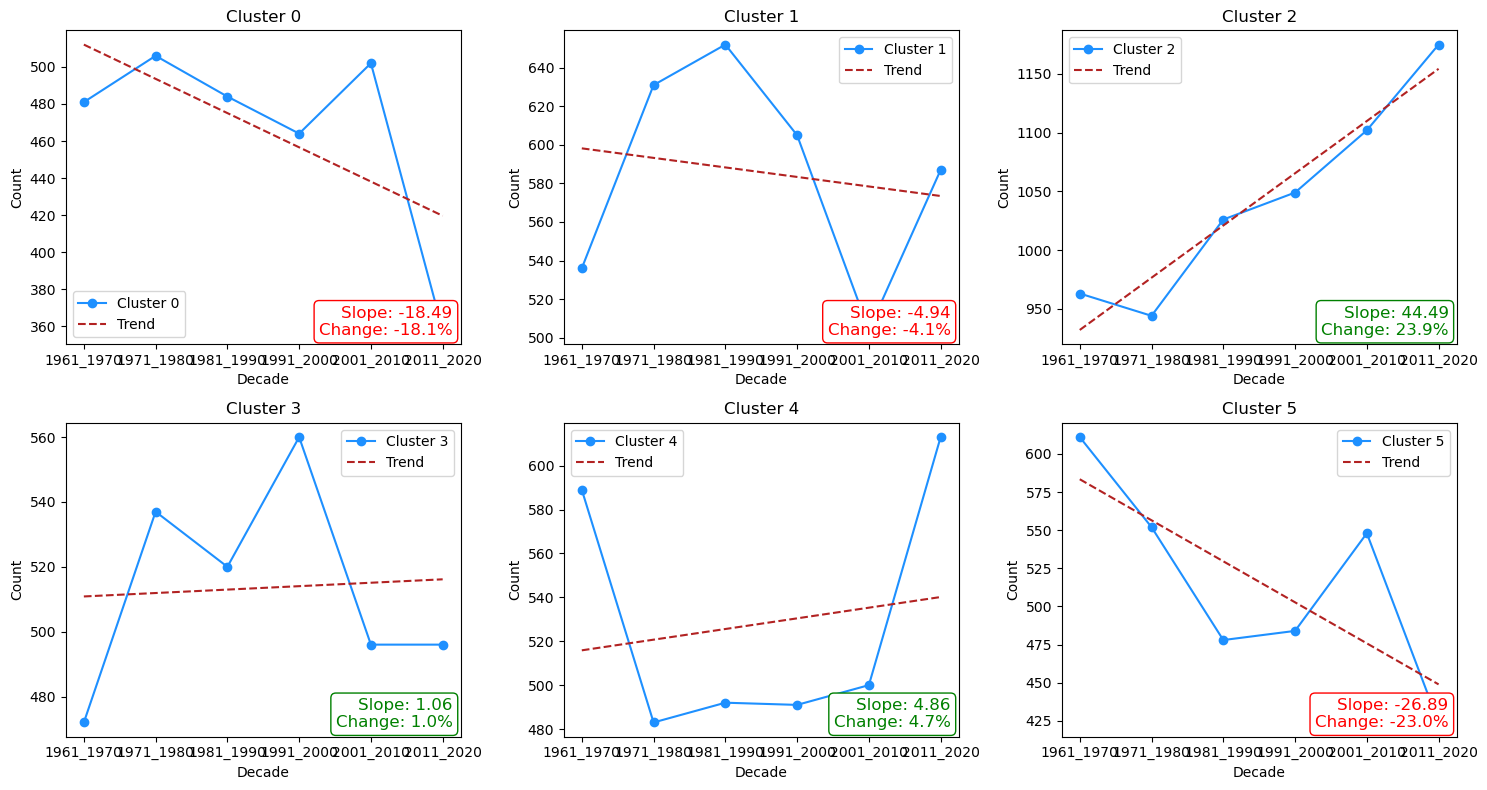

In [4]:
# Plot trends for significant clusters
significant_clusters = [0,1, 2, 3,4,5]  
decades = sorted(df_all['period'].unique())
n_clusters = len(significant_clusters)
n_cols = 3
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for idx, k in enumerate(significant_clusters):
    counts = []
    for decade in decades:
        count = (df_all[(df_all['cluster'] == k) & (df_all['period'] == decade)].shape[0])
        counts.append(count)
    ax = axes[idx]
    ax.plot(decades, counts, marker='o', color='dodgerblue', label=f'Cluster {k}')
    # Linear regression
    X = np.arange(len(decades)).reshape(-1,1)
    reg = LinearRegression().fit(X, counts)
    y_pred = reg.predict(X)
    ax.plot(decades, y_pred, color='firebrick', linestyle='--', label='Trend')
    # Statistics
    slope = reg.coef_[0]
    perc_change = 100 * (y_pred[-1] - y_pred[0]) / y_pred[0] if y_pred[0] != 0 else np.nan
    color = 'green' if perc_change > 0 else 'red'
    label_text = f"Slope: {slope:.2f}\nChange: {perc_change:.1f}%"
    ax.text(0.98, 0.02, label_text, color=color, fontsize=12, ha='right', va='bottom', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))
    ax.set_title(f'Cluster {k}')
    ax.set_xlabel('Decade')
    ax.set_ylabel('Count')
    ax.legend()

# Remove empty subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Same graphs but per year

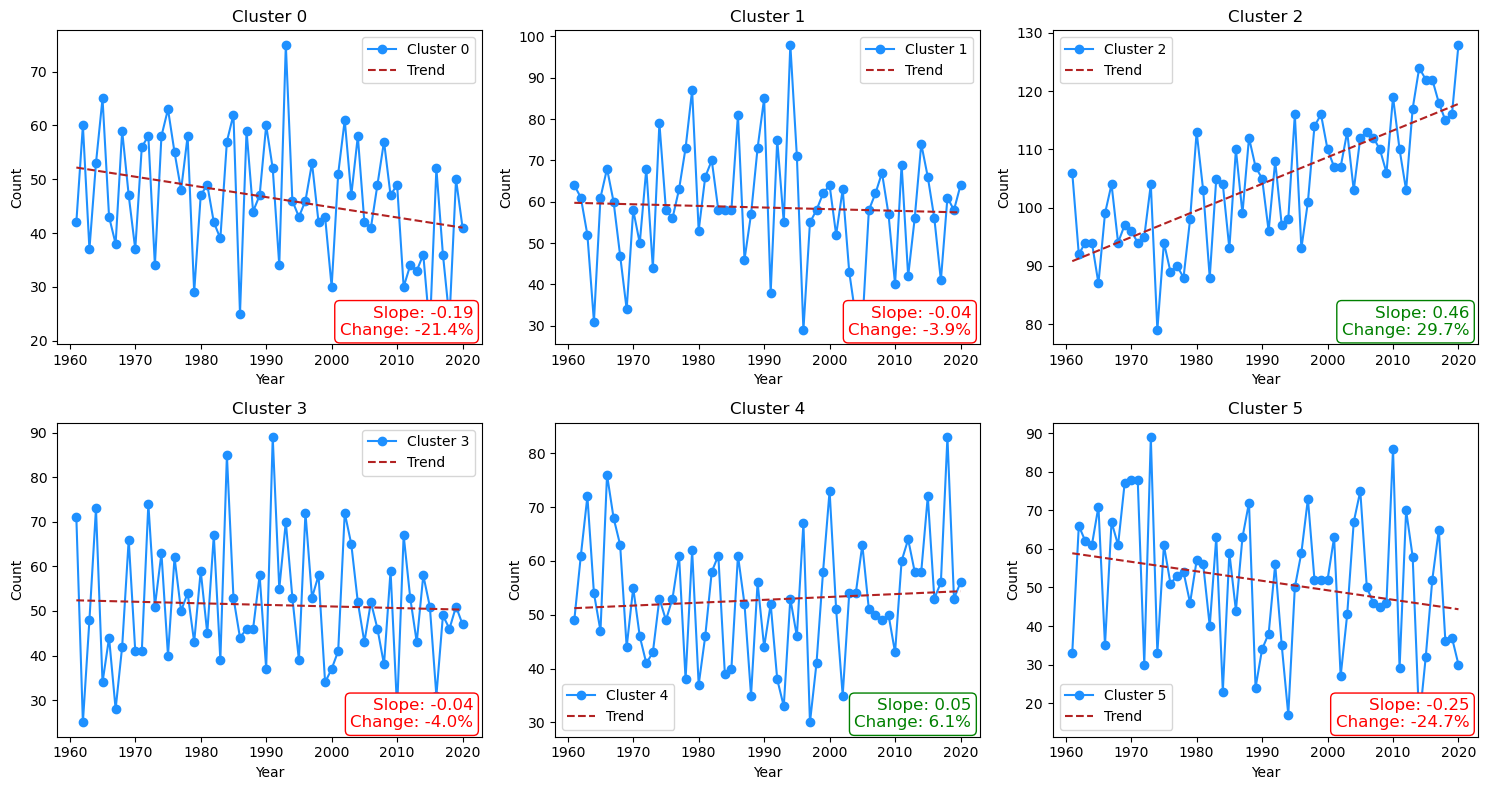

In [5]:
years = sorted(df_all['year'].unique())
n_clusters = df_all['cluster'].nunique()
n_cols = 3
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for idx, k in enumerate(range(n_clusters)):
    counts = []
    for year in years:
        count = (df_all[(df_all['cluster'] == k) & (df_all['year'] == year)].shape[0])
        counts.append(count)
    ax = axes[idx]
    ax.plot(years, counts, marker='o', color='dodgerblue', label=f'Cluster {k}')
    # Linear regression
    X = np.arange(len(years)).reshape(-1,1)
    reg = LinearRegression().fit(X, counts)
    y_pred = reg.predict(X)
    ax.plot(years, y_pred, color='firebrick', linestyle='--', label='Trend')
    slope = reg.coef_[0]
    perc_change = 100 * (y_pred[-1] - y_pred[0]) / y_pred[0] if y_pred[0] != 0 else np.nan
    color = 'green' if perc_change > 0 else 'red'
    label_text = f"Slope: {slope:.2f}\nChange: {perc_change:.1f}%"
    ax.text(0.98, 0.02, label_text, color=color, fontsize=12, ha='right', va='bottom', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))
    ax.set_title(f'Cluster {k}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.legend()

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

___________________________11/09/2025

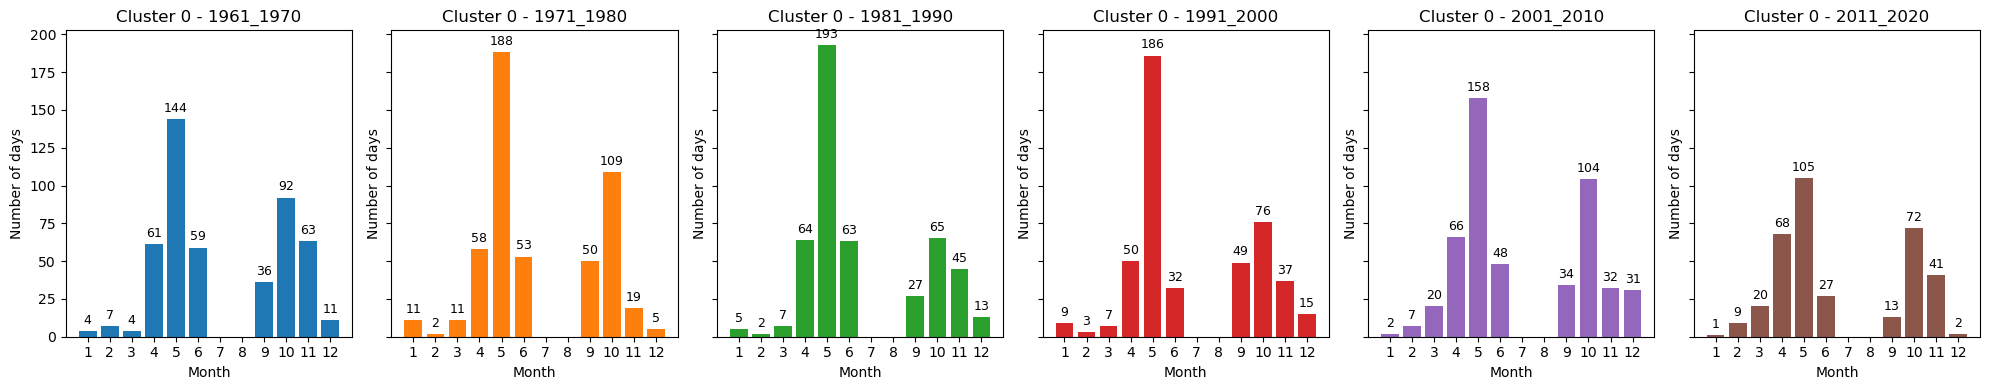

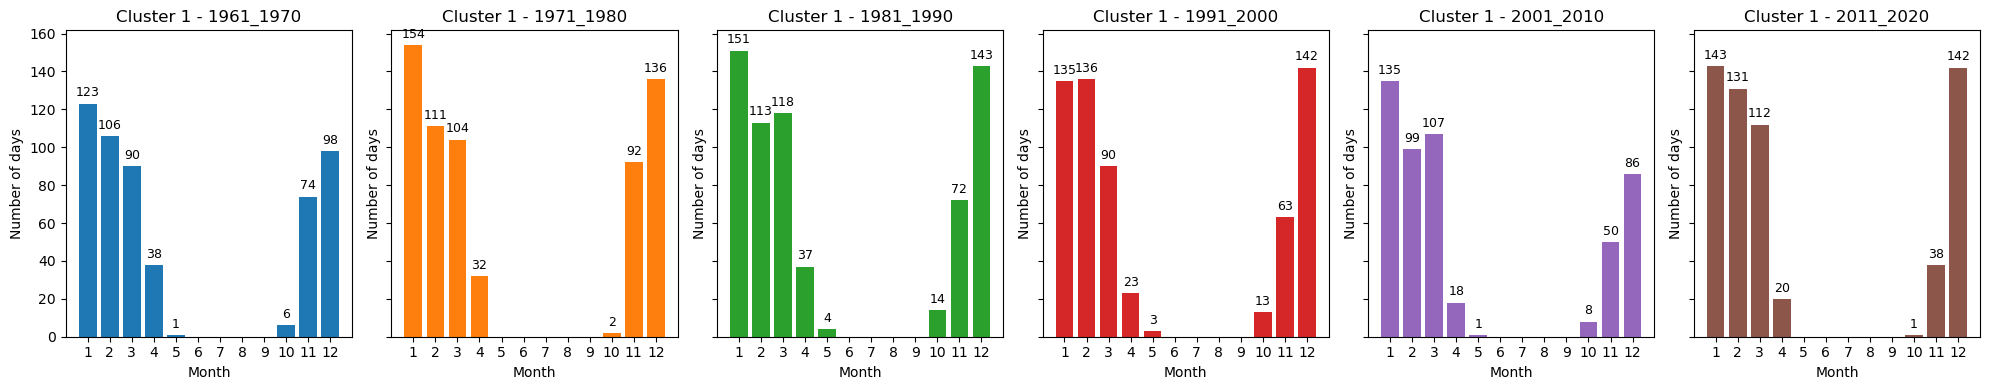

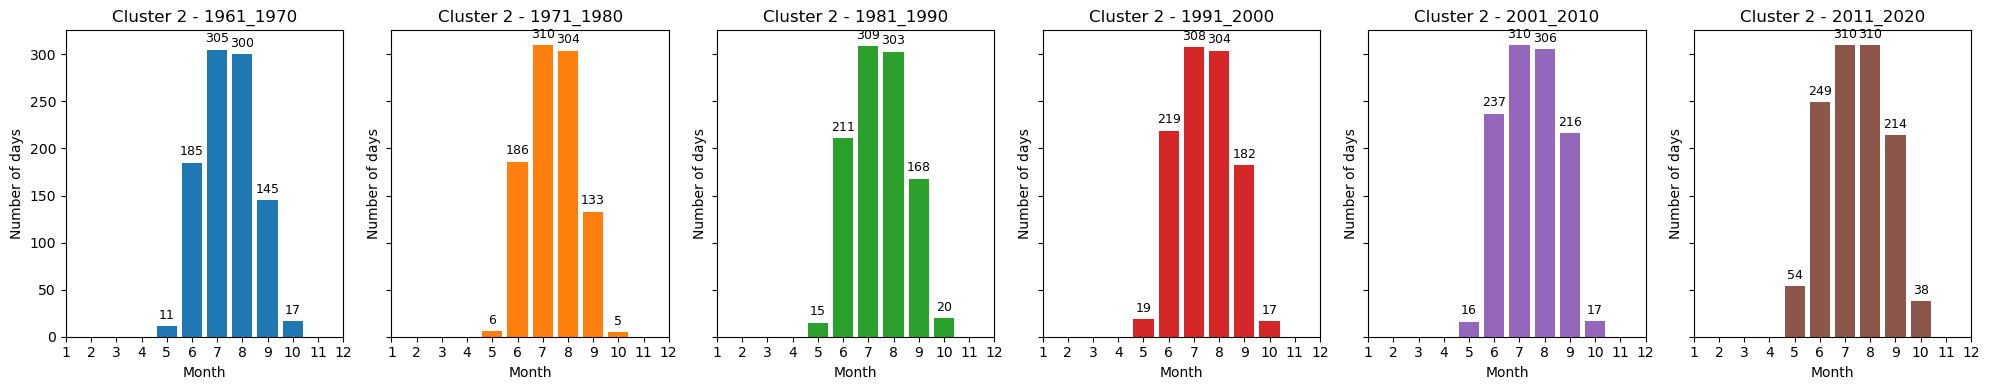

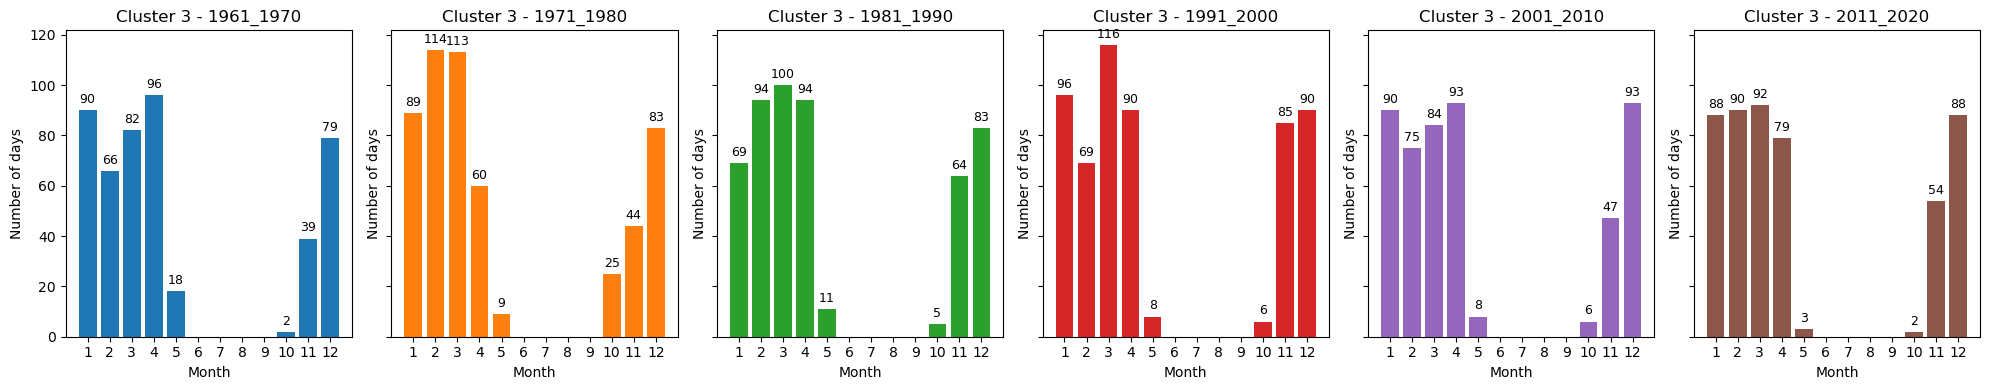

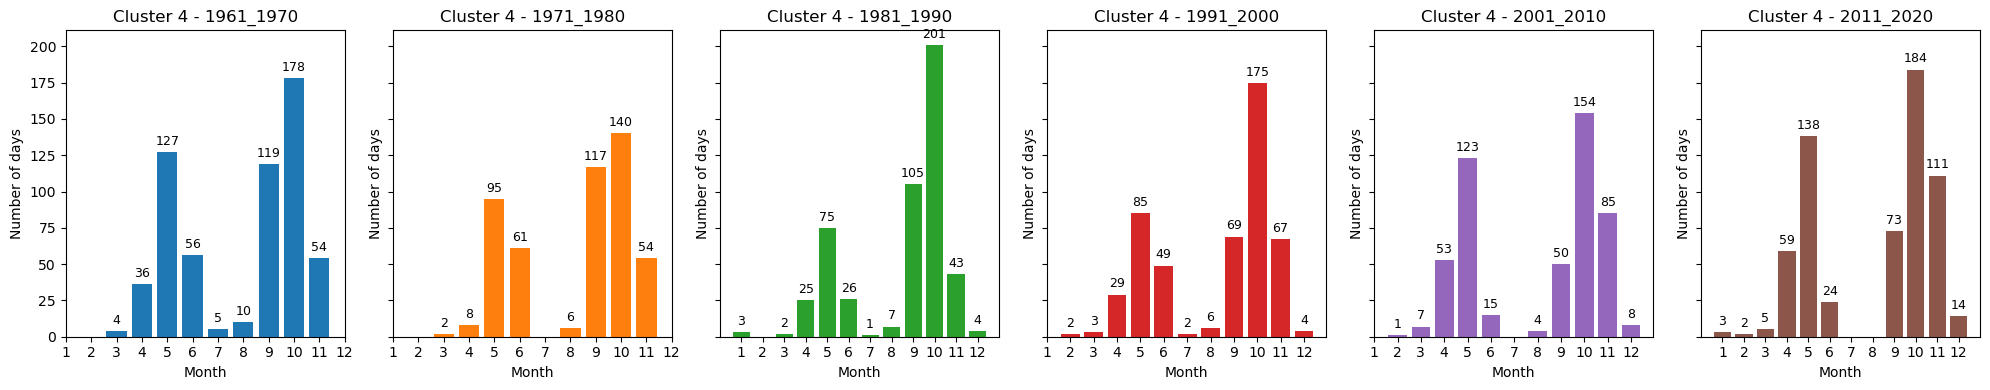

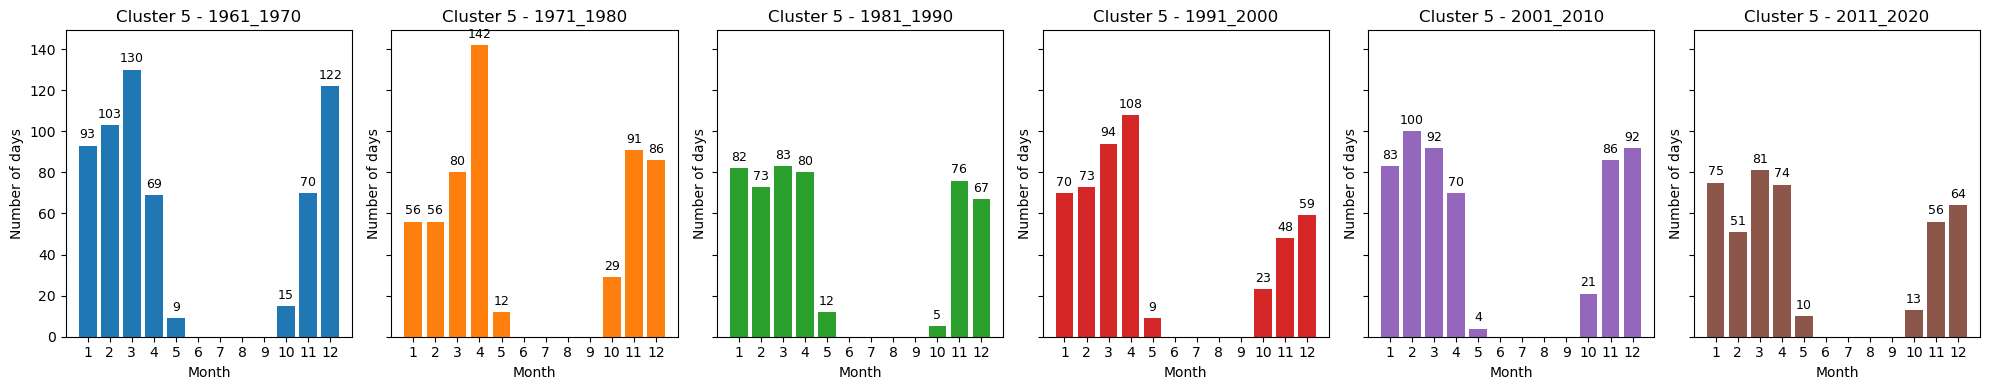

In [6]:
# Monthly distribution per cluster and period
n_clusters = df_all['cluster'].nunique()

colors = sns.color_palette("tab10", n_colors=len(period_names))

for cluster in range(n_clusters):
    fig, axes = plt.subplots(1, len(period_names), figsize=(20, 4), sharey=True)
    for i, period in enumerate(period_names):
        subset = df_all[(df_all['cluster'] == cluster) & (df_all['period'] == period)]
        counts = subset['month'].value_counts().sort_index()
        total_count = counts.sum()
        bars = axes[i].bar(counts.index, counts.values, color=colors[i])
        axes[i].set_title(f'Cluster {cluster} - {period}')
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel('Number of days')
        axes[i].set_xticks(range(1, 13))
        # Aggiungi il numero sopra ogni barra
        for bar in bars:
            height = bar.get_height()
            axes[i].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords="offset points",
                             ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

#### Cross tab   

In [7]:
# Create a pivot table for better visualization
pivot_table = pd.crosstab(
    [df_all['period'], df_all['month']],
    df_all['cluster']
)

print(pivot_table)
pivot_table.to_csv("Mid_result_to_save/tab_period_month_k20.csv")   #### CHANGE WHEN CHANGING k

cluster            0    1    2   3    4    5
period    month                             
1961_1970 1        4  123    0  90    0   93
          2        7  106    0  66    0  103
          3        4   90    0  82    4  130
          4       61   38    0  96   36   69
          5      144    1   11  18  127    9
...              ...  ...  ...  ..  ...  ...
2011_2020 8        0    0  310   0    0    0
          9       13    0  214   0   73    0
          10      72    1   38   2  184   13
          11      41   38    0  54  111   56
          12       2  142    0  88   14   64

[72 rows x 6 columns]


cluster      0   1   2   3   4   5
year month                        
1961 1       0  18   0  13   0   0
     2       0  12   0  16   0   0
     3       0   8   0  12   0  11
     4       3   5   0  17   0   5
     5      21   0   0   1   9   0
...         ..  ..  ..  ..  ..  ..
2020 8       0   0  31   0   0   0
     9       0   0  23   0   7   0
     10      7   0  10   0  14   0
     11      6   1   0   6  17   0
     12      0   3   0  17   2   9

[720 rows x 6 columns]


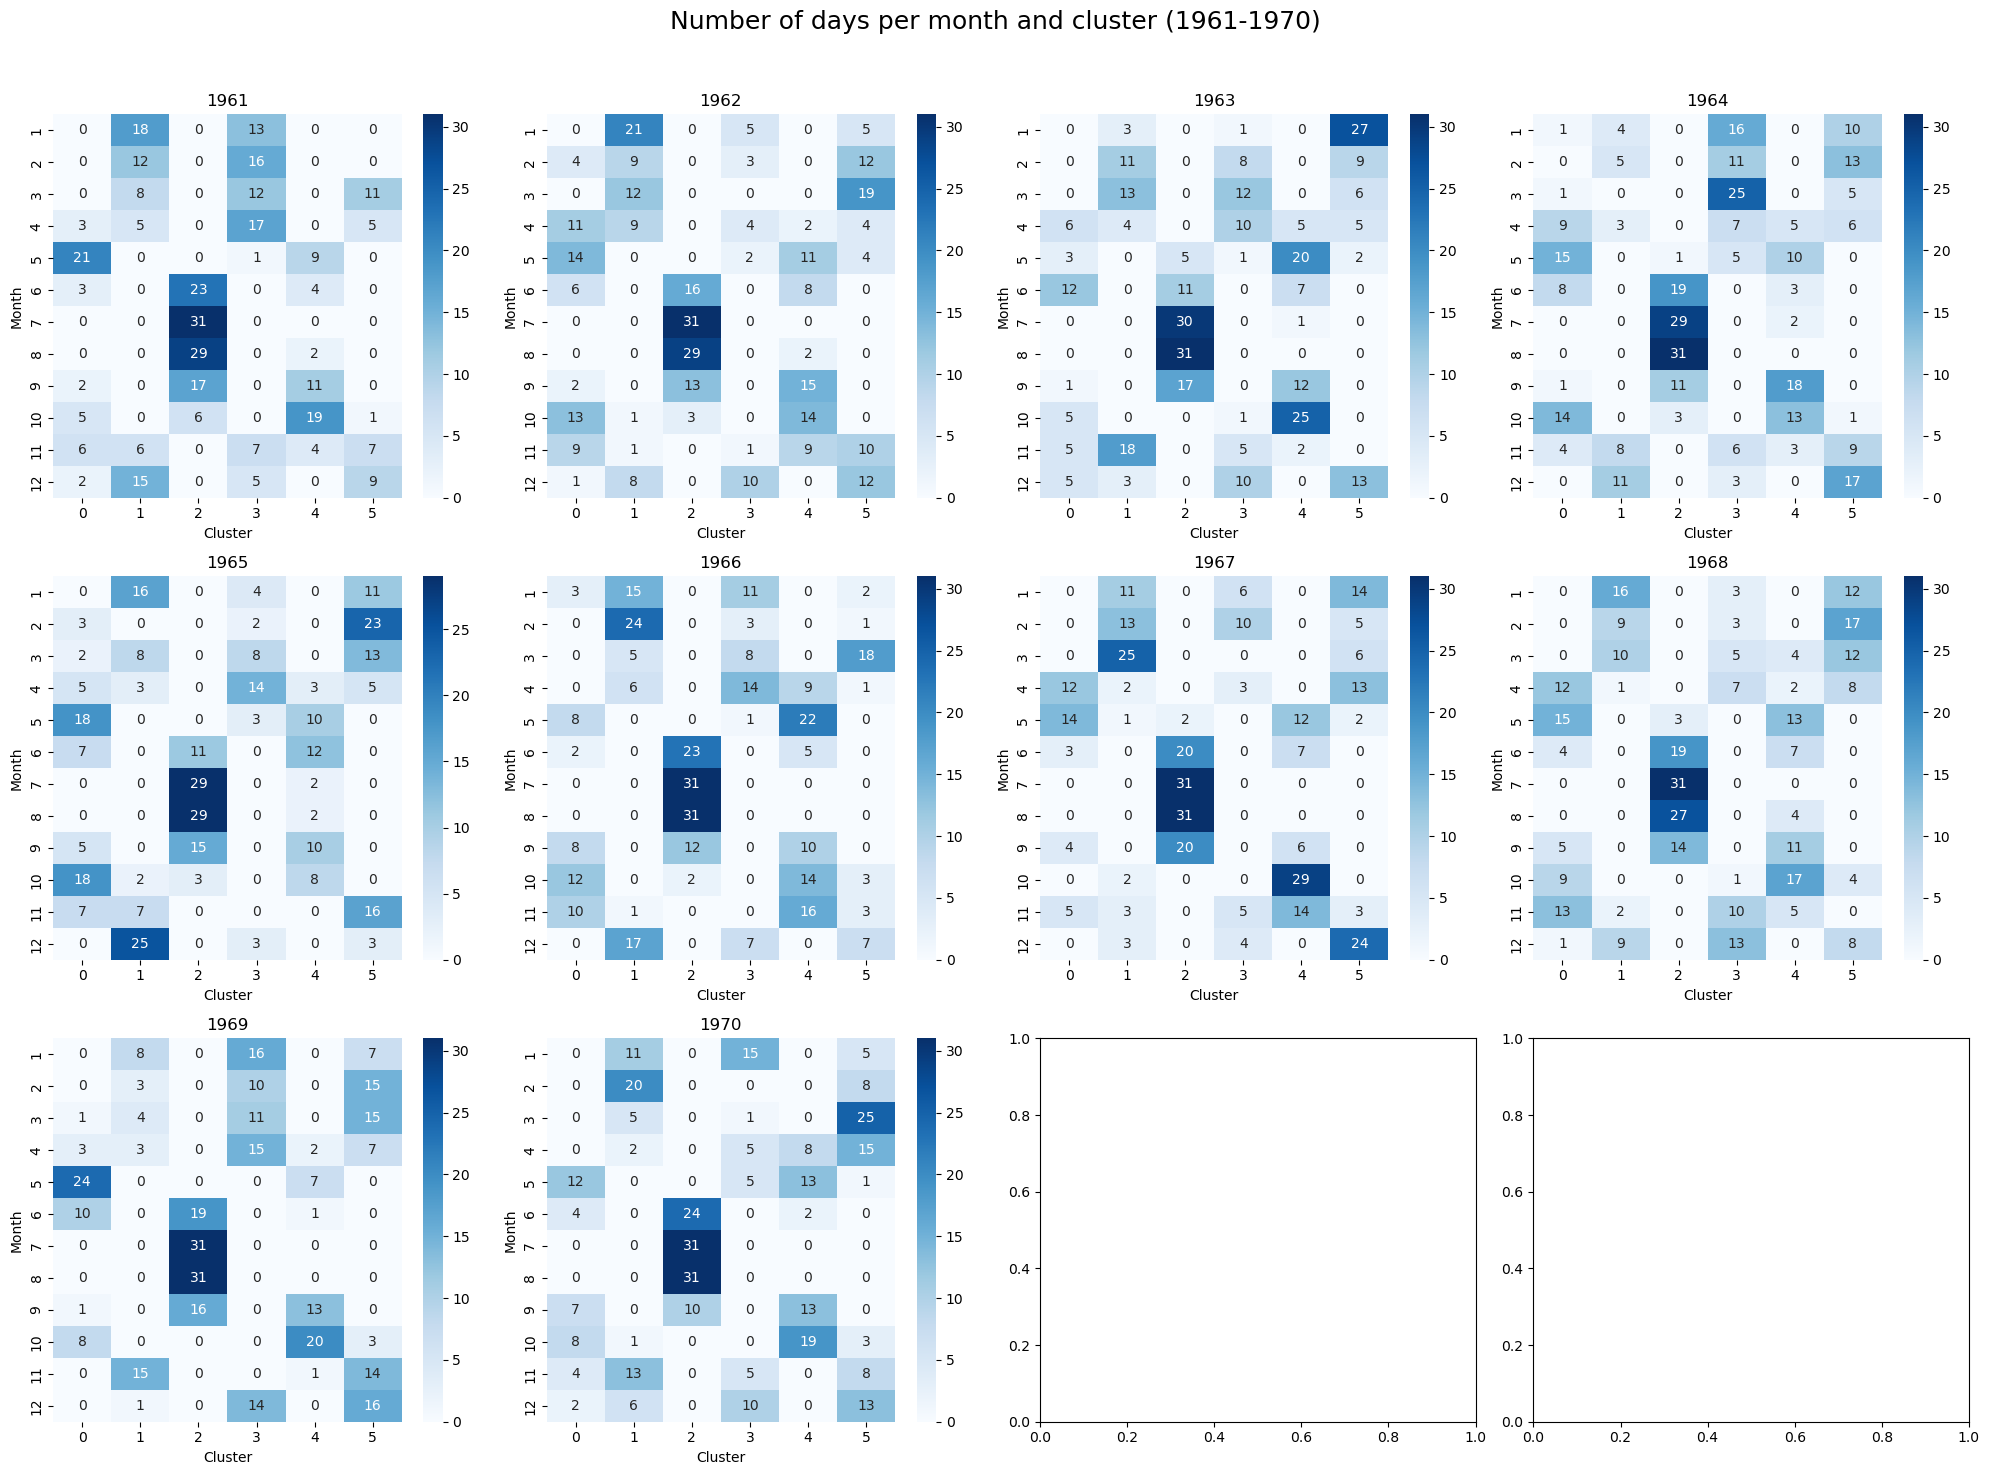

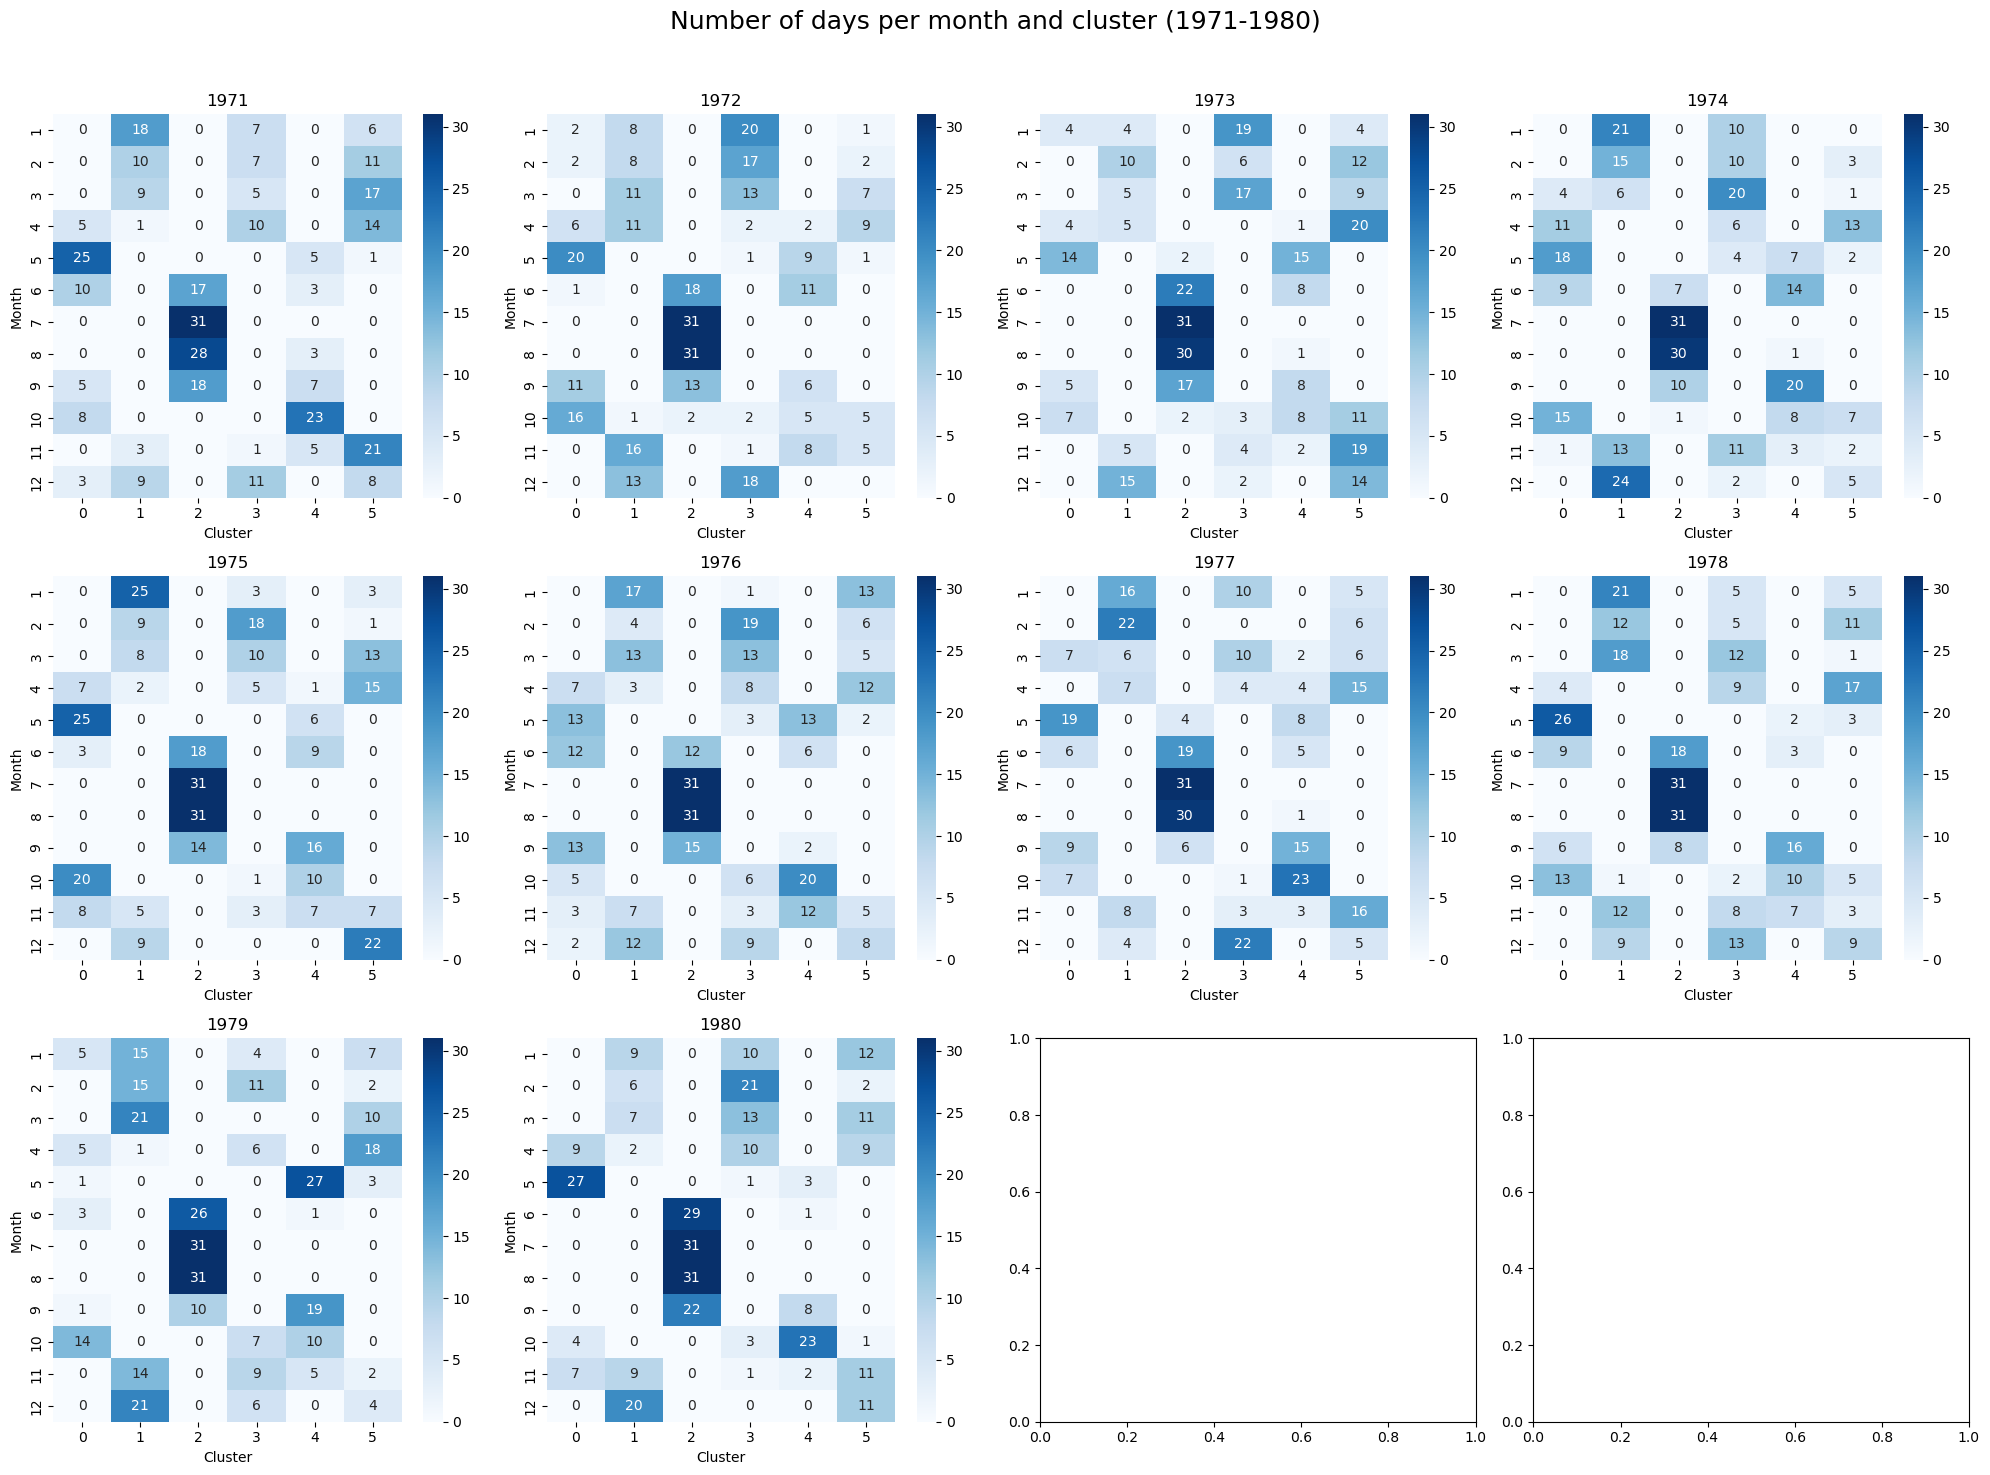

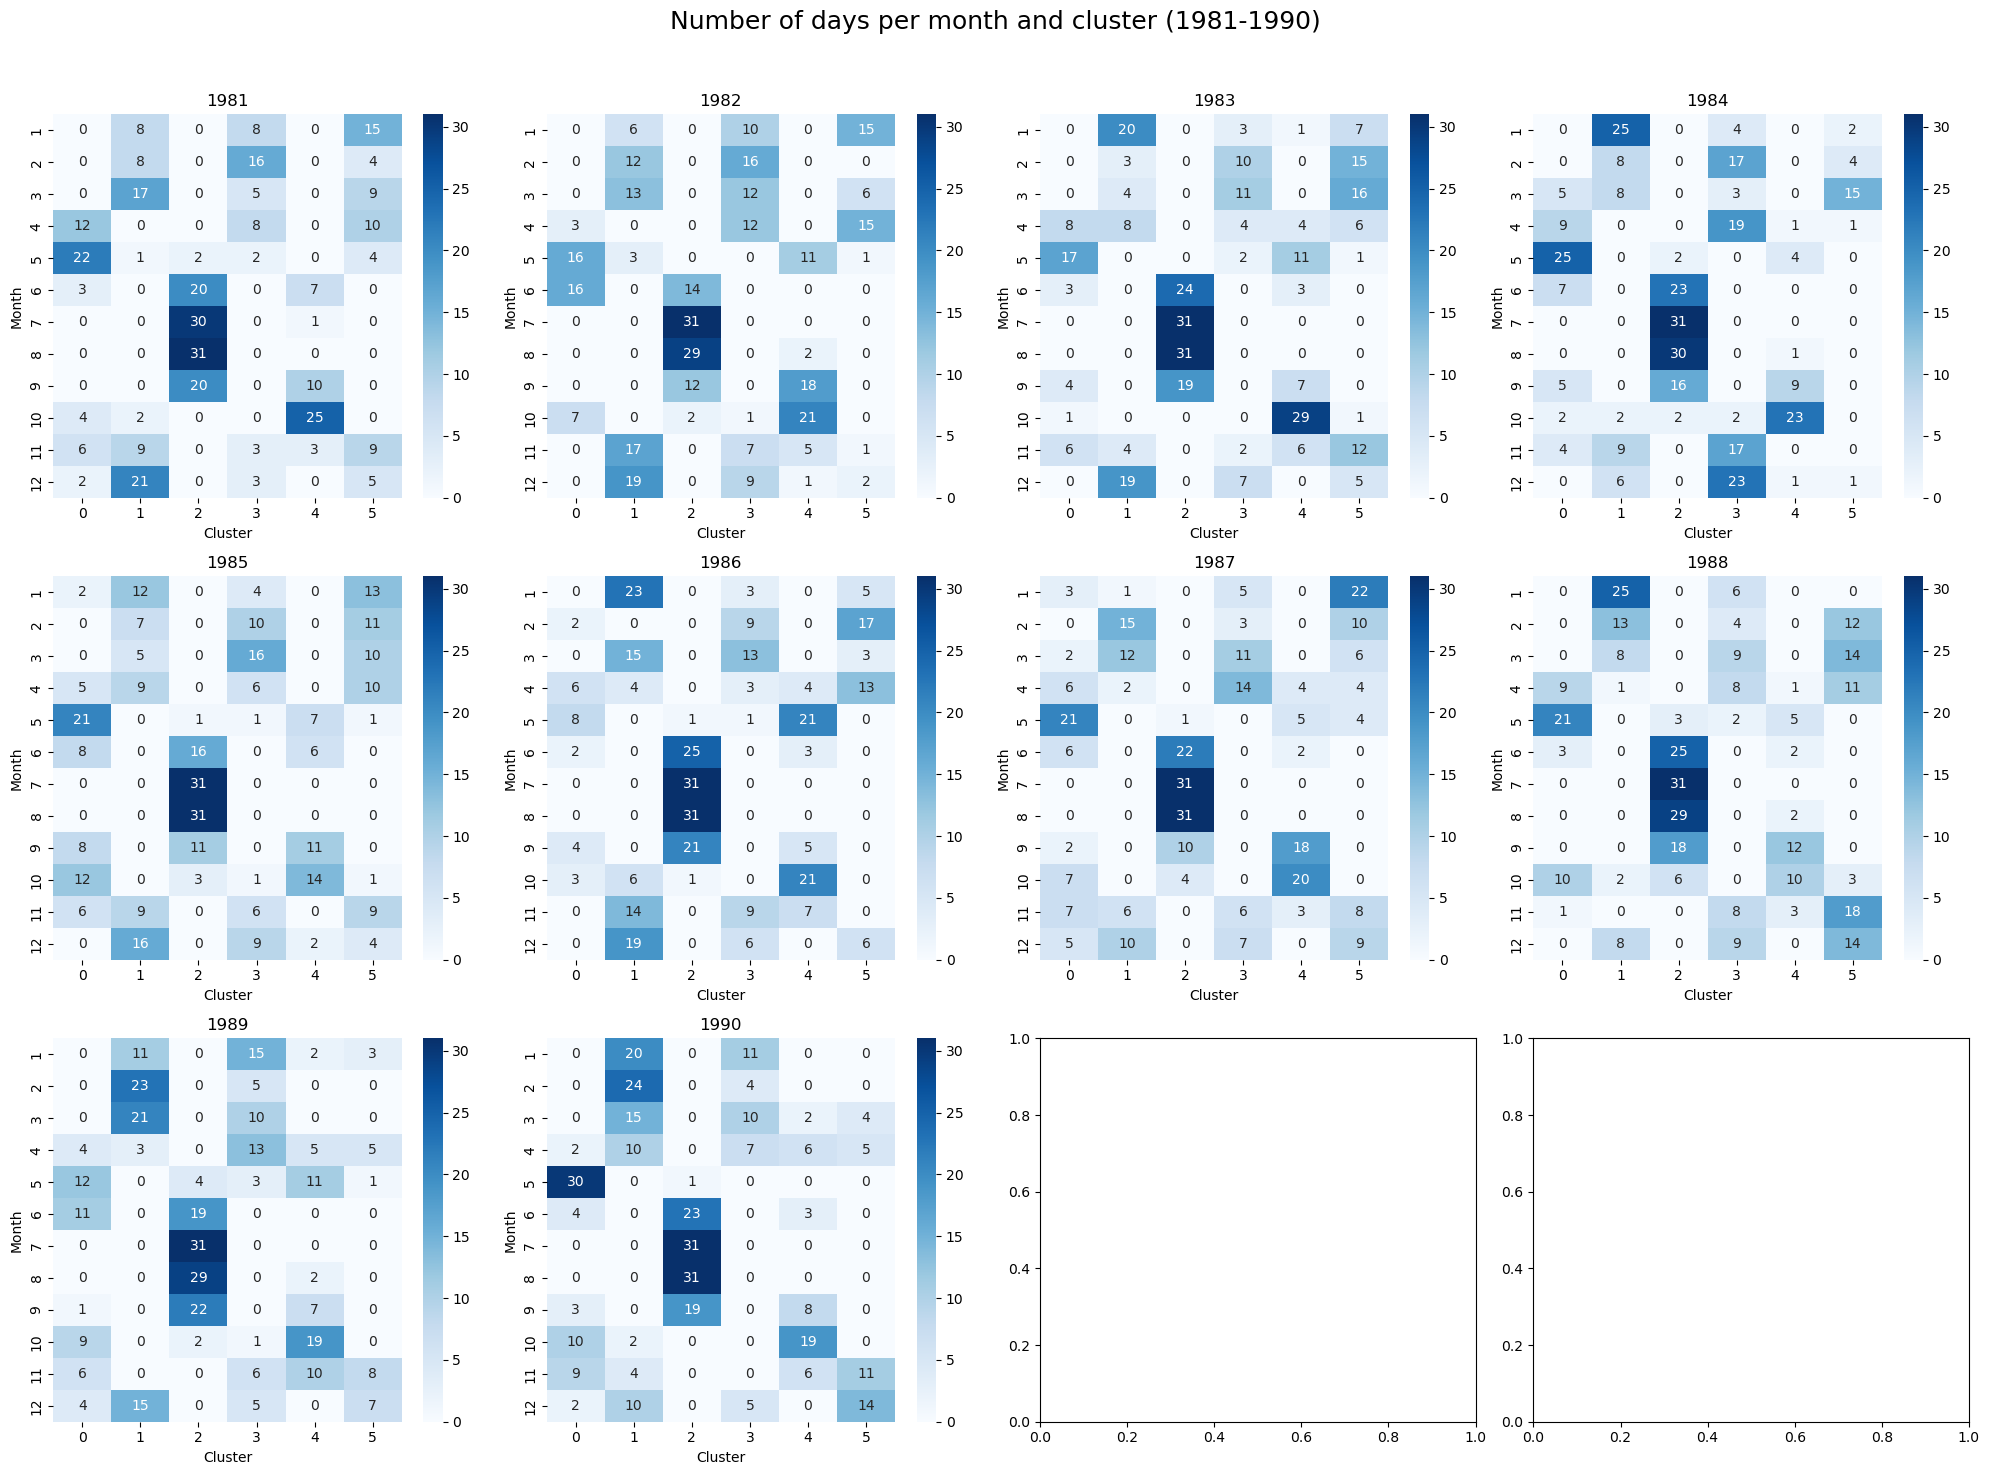

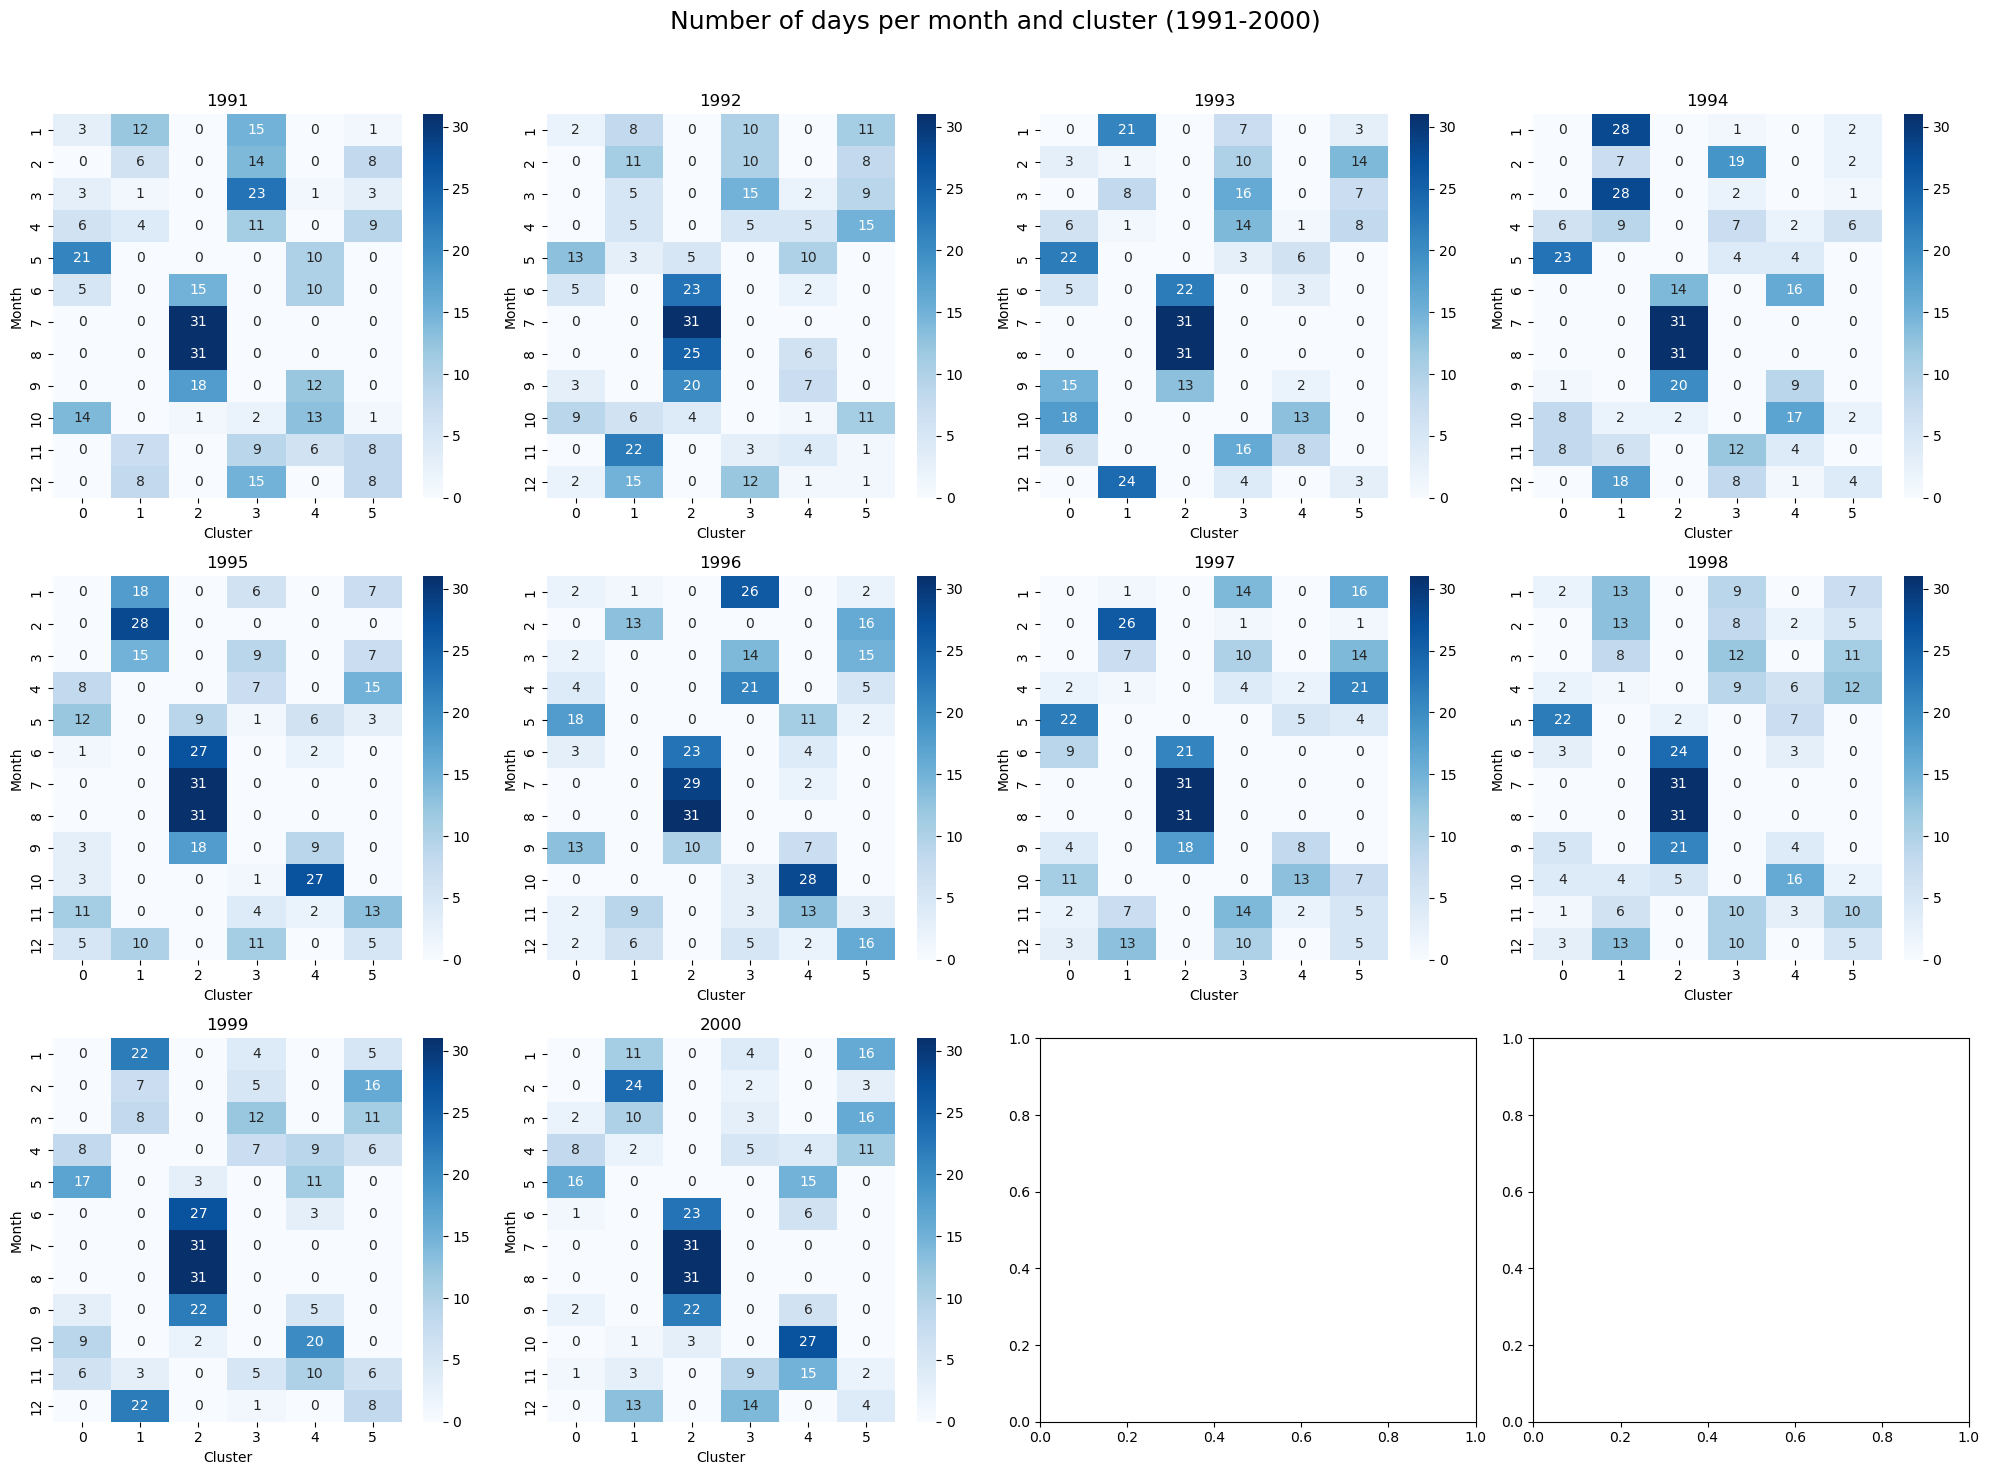

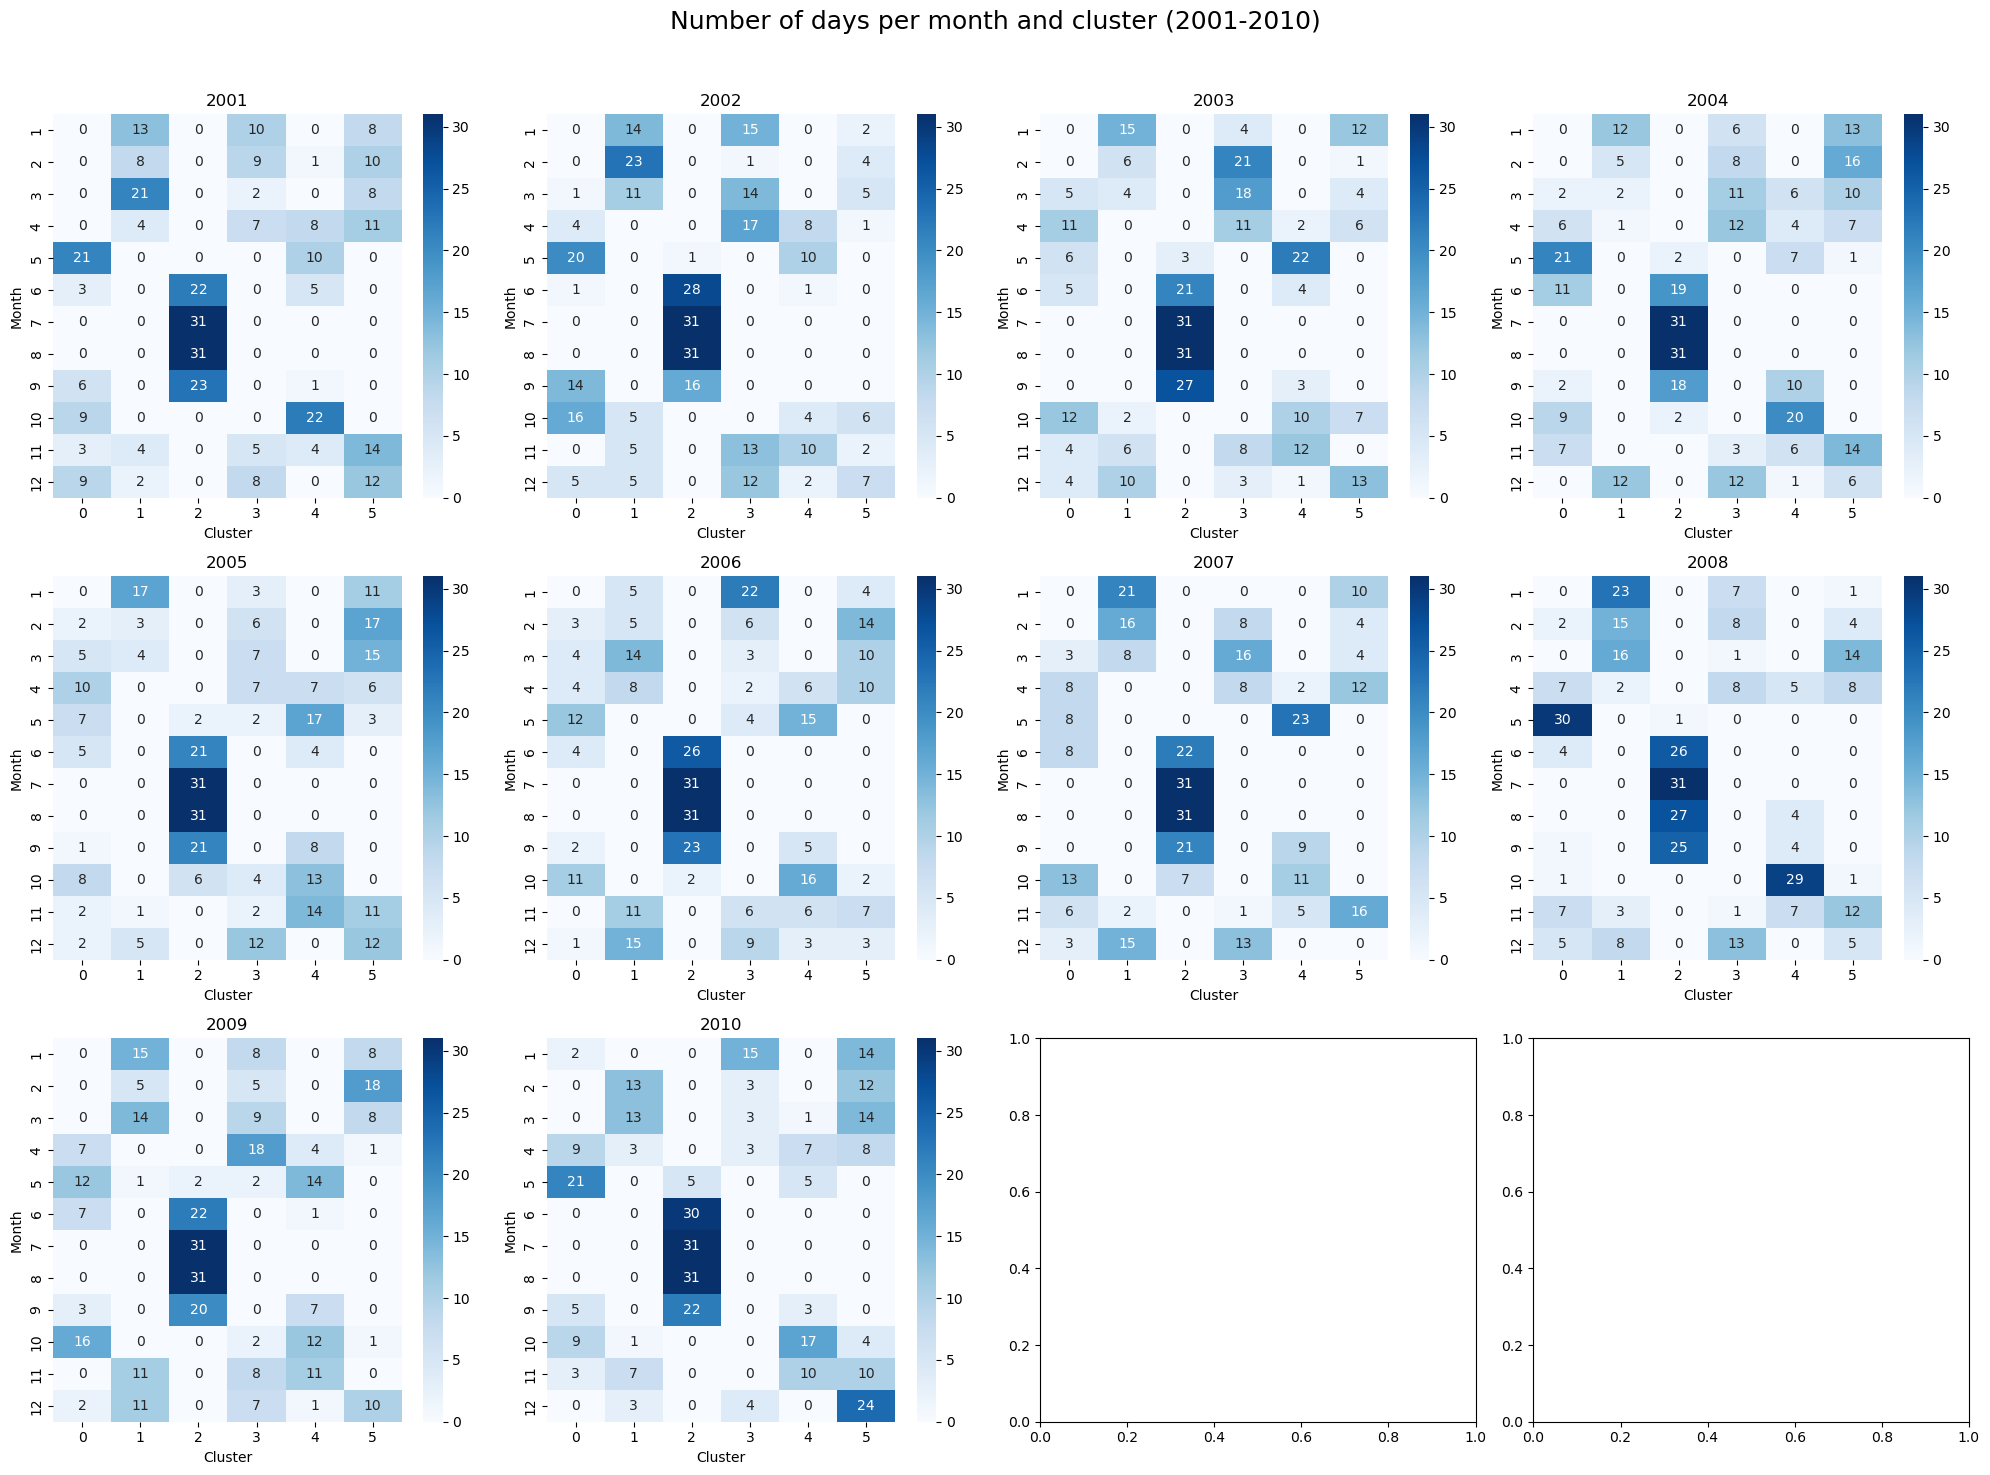

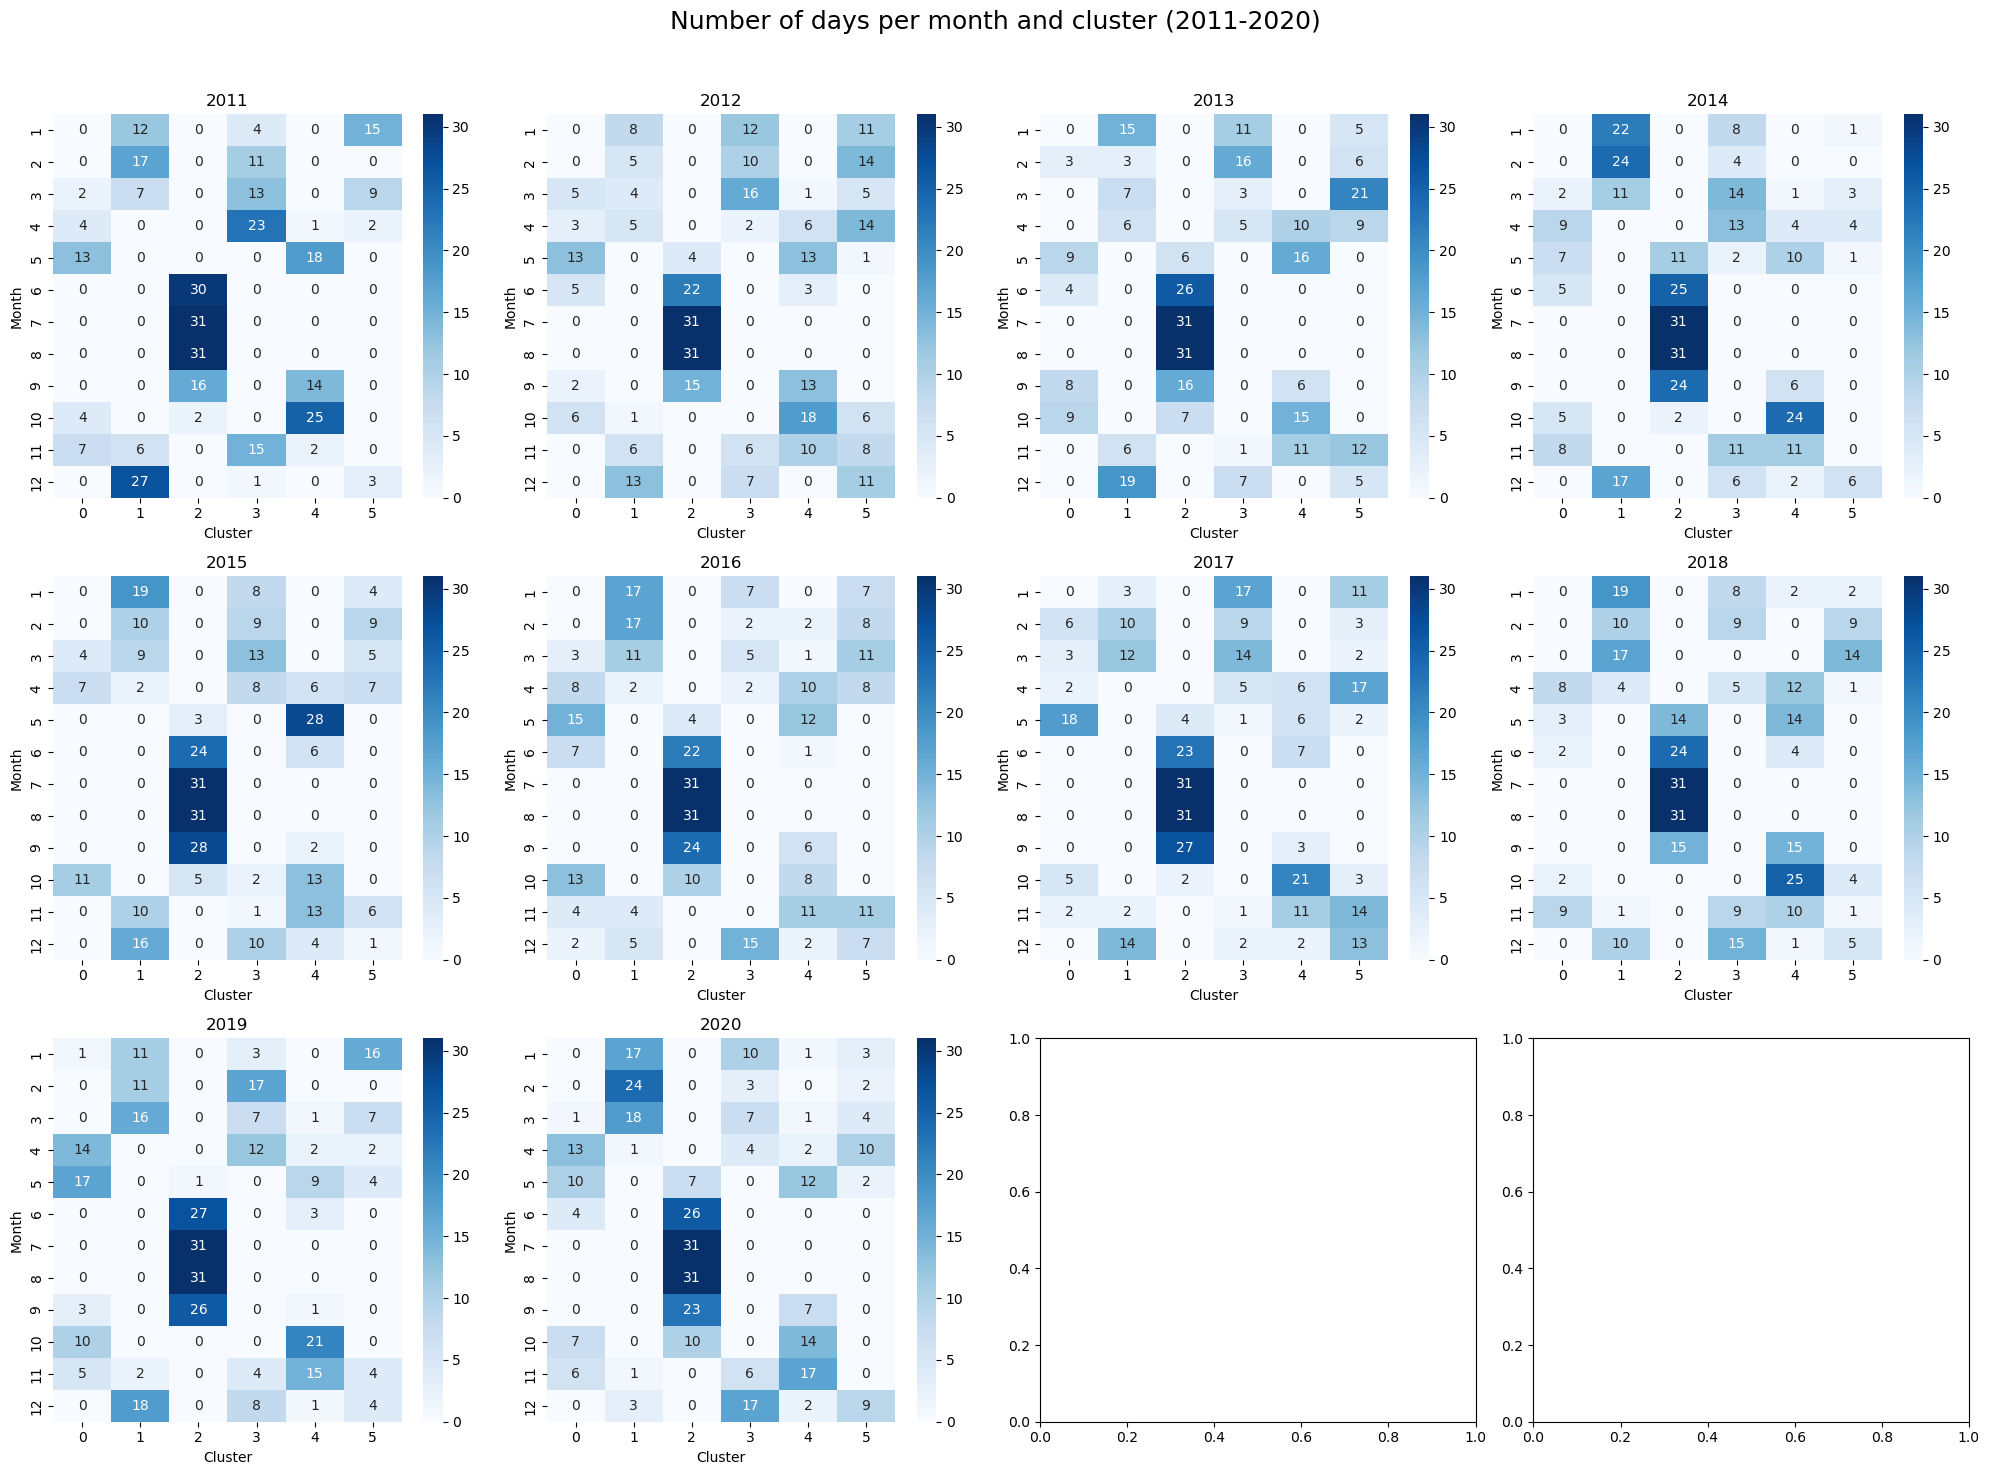

In [8]:
# Create a pivot table per year and month
pivot_table_year = pd.crosstab(
    [df_all['year'], df_all['month']],
    df_all['cluster']
)
print(pivot_table_year)
pivot_table_year.to_csv("Mid_result_to_save/tab_year_month_k6.csv")  ## CHANGE WHEN CHANGING k

# Decade ranges
decade_ranges = [(1961,1970), (1971,1980), (1981,1990), (1991,2000), (2001,2010), (2011,2020)]

for start, end in decade_ranges:
    years_in_decade = list(range(start, end+1))
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()
    for idx, year in enumerate(years_in_decade):
        if year in pivot_table_year.index.get_level_values(0):
            data = pivot_table_year.loc[year]
            ax = axes[idx]
            sns.heatmap(data, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'{year}')
            ax.set_xlabel('Cluster')
            ax.set_ylabel('Month')
            ax.set_yticks(np.arange(12)+0.5)
            ax.set_yticklabels([str(m) for m in range(1, 13)])
        else:
            fig.delaxes(axes[idx])
    plt.suptitle(f'Number of days per month and cluster ({start}-{end})', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

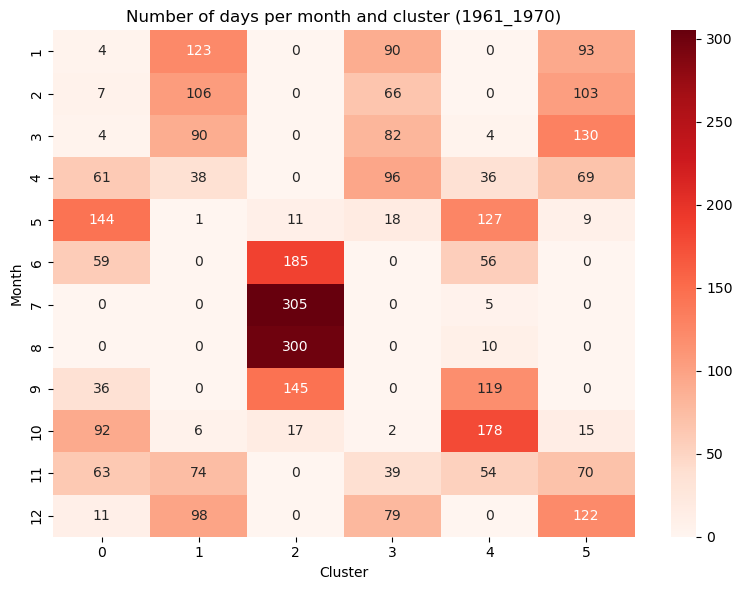

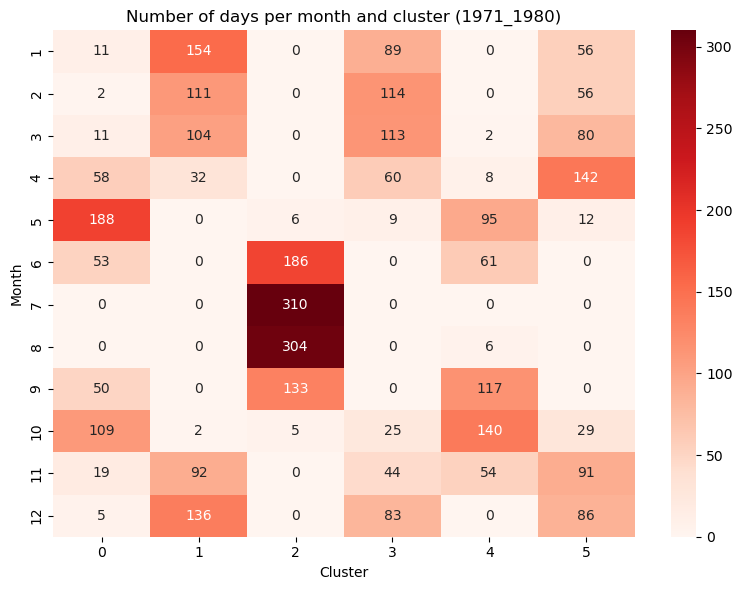

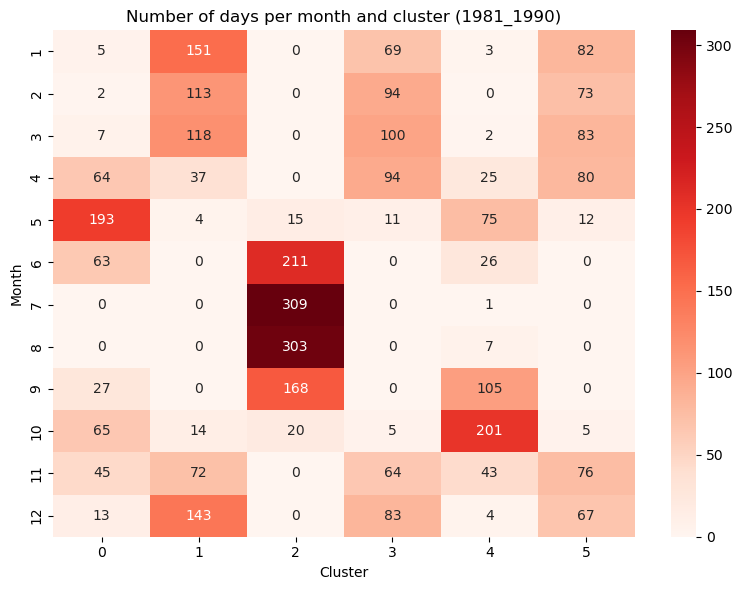

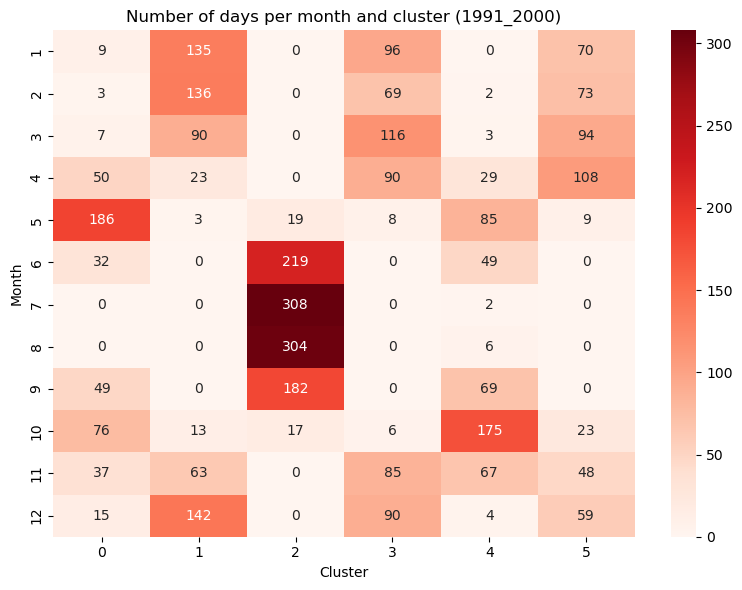

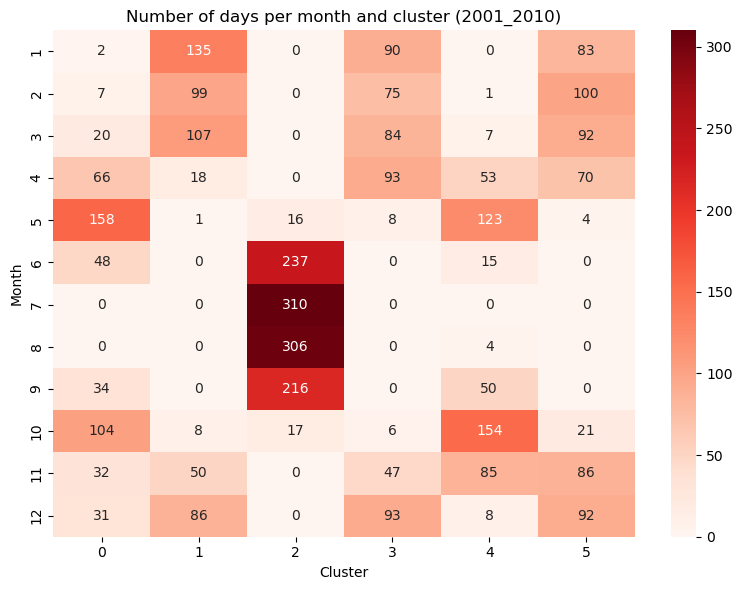

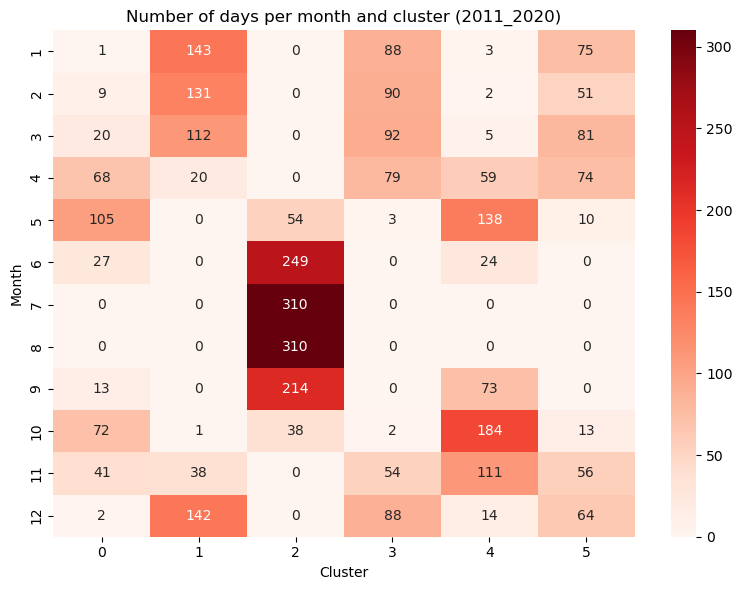

In [9]:
pivot_reset = pivot_table.reset_index()

# Heatmaps for each period
for period in pivot_table.index.get_level_values(0).unique():
    data = pivot_table.loc[period]
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Number of days per month and cluster ({period})')
    plt.xlabel('Cluster')
    plt.ylabel('Month')
    plt.yticks(ticks=np.arange(12)+0.5, labels=[str(m) for m in range(1, 13)])
    plt.tight_layout()
    plt.show()

Same tabs but not for each decade but per year

_________________________________12/09/2025 - colloquio prof

           Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Decade                                                                     
1961_1970   8.526583   9.211560   6.856776   9.059584   8.100519   9.951448
1971_1980   8.486416   9.411272   6.865981   9.482673   8.066021   9.622552
1981_1990   8.678007   9.580431   7.022867   9.219319   8.314739   9.699339
1991_2000   8.766718   9.262757   6.867582   9.352684   8.242405   9.812910
2001_2010   8.617577   9.197843   6.948504   8.950732   8.262260   9.811819
2011_2020   8.994091   9.290413   7.063156   9.542332   8.470201   9.476292


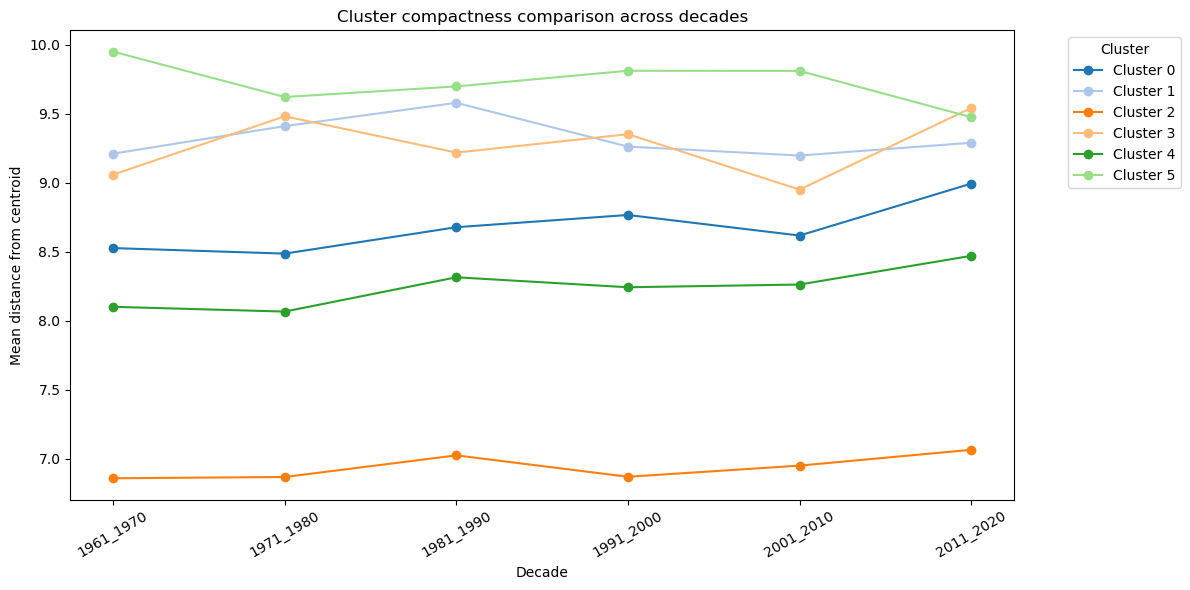

In [10]:
# Calculate mean distances to centroids for each cluster in each decade
def mean_distances_to_centroids(X_pca, labels, centroids):
    """Restituisce la distanza media di ogni cluster dal proprio centroide."""
    results = []
    for k in range(centroids.shape[0]):
        mask = labels == k
        if np.sum(mask) > 0:
            dists = np.linalg.norm(X_pca[mask] - centroids[k], axis=1)
            results.append(dists.mean())
    return results


mean_dists_per_decade = []
for decade in period_names:
    X_pca = np.load(f"Mid_result_to_save/X_pca_{decade}.npy")  
    labels = np.load(f"Mid_result_to_save/labels_{decade}.npy")
    dists = mean_distances_to_centroids(X_pca, labels, centroids)
    mean_dists_per_decade.append(dists)

# Create DataFrame
df_decades = pd.DataFrame(mean_dists_per_decade, columns=[f"Cluster {i}" for i in range(centroids.shape[0])])
df_decades["Decade"] = period_names
df_decades = df_decades.set_index("Decade")
print(df_decades)

# Plot compactness cluster as line plot
fig, ax = plt.subplots(figsize=(12,6))
for i, cluster in enumerate(df_decades.columns):
    ax.plot(df_decades.index, df_decades[cluster], color=plt.cm.tab20(i), marker='o', label=cluster)
ax.set_ylabel('Mean distance from centroid')
ax.set_xlabel('Decade')
ax.set_title('Cluster compactness comparison across decades')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/tmp/ipykernel_8788/1725477722.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(decade_names))


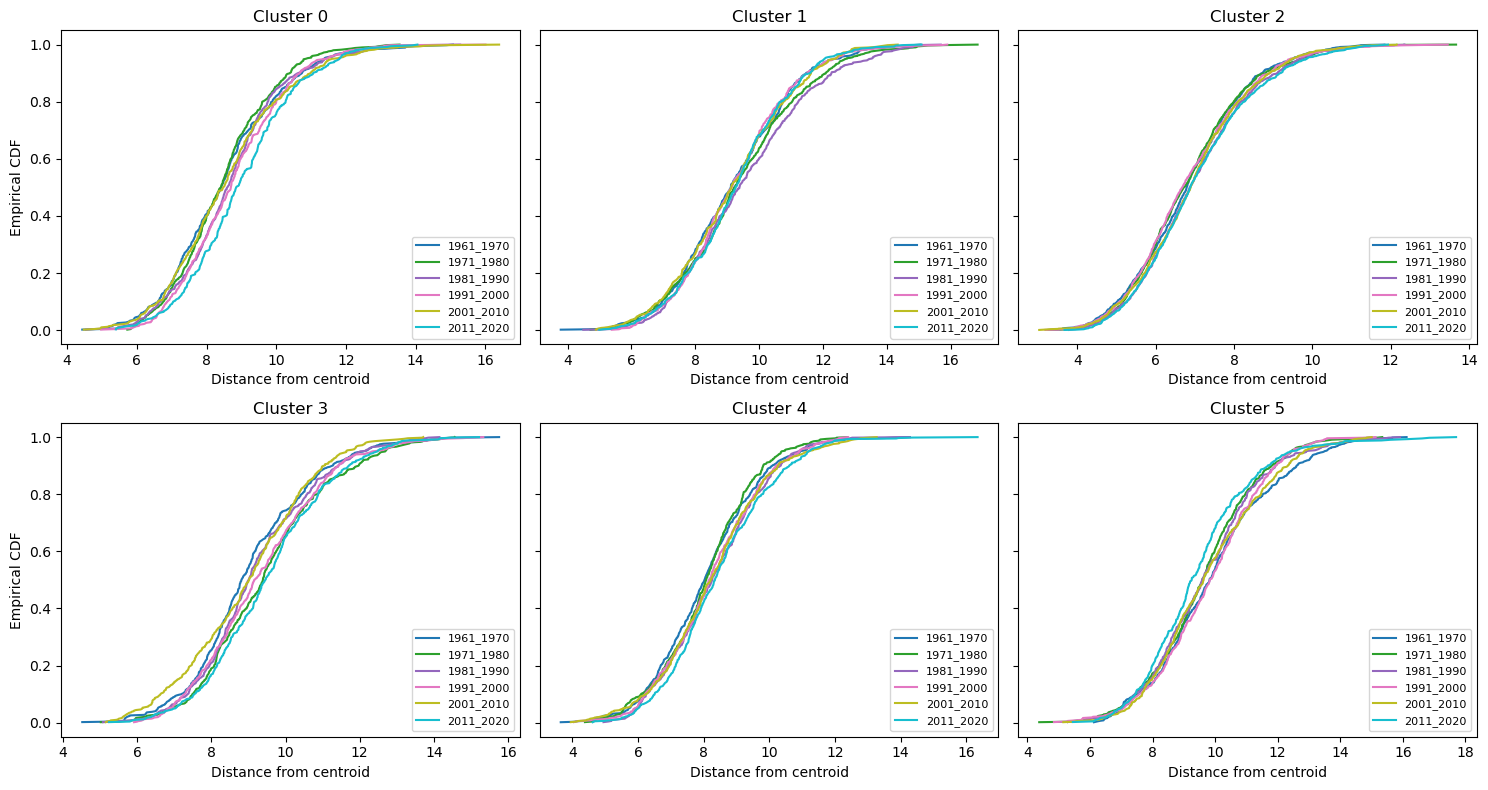

In [11]:
# Plot CDF of distances from centroid for each cluster and decade
def plot_cdf_distances_decades(decade_names, centroids):
    k_clusters = centroids.shape[0]
    n_cols = 3
    n_rows = int(np.ceil(k_clusters / n_cols))
    colors = plt.cm.get_cmap('tab10', len(decade_names))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=True)
    axes = axes.flatten()
    for k in range(k_clusters):
        ax = axes[k]
        for i, decade in enumerate(decade_names):
            X_pca = np.load(f"Mid_result_to_save/X_pca_{decade}.npy")
            labels = np.load(f"Mid_result_to_save/labels_{decade}.npy")
            mask = labels == k
            if np.sum(mask) > 0:
                dists = np.linalg.norm(X_pca[mask] - centroids[k], axis=1)
                sorted_dists = np.sort(dists)
                cdf = np.arange(1, len(sorted_dists)+1) / len(sorted_dists)
                ax.plot(sorted_dists, cdf, color=colors(i), label=decade)
        ax.set_title(f'Cluster {k}')
        ax.set_xlabel('Distance from centroid')
        if k % n_cols == 0:
            ax.set_ylabel('Empirical CDF')
        ax.legend(loc='lower right', fontsize=8)
    for j in range(k_clusters, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

# Use
plot_cdf_distances_decades(period_names, centroids)

Ora vediamo la silhouette --> misura quanto ogni punto è ben asseganto al proprio cluster rispetto agli altri cluster

      Decade  Mean Silhouette
0  1961_1970         0.146917
1  1971_1980         0.145468
2  1981_1990         0.160451
3  1991_2000         0.164629
4  2001_2010         0.168092
5  2011_2020         0.173259
           Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Decade                                                                     
1961_1970   0.064190   0.141648   0.277927   0.110841   0.109199   0.074408
1971_1980   0.061854   0.132309   0.271581   0.082363   0.117354   0.107473
1981_1990   0.075510   0.125648   0.284316   0.106041   0.125747   0.122969
1991_2000   0.069407   0.161492   0.292412   0.104028   0.122653   0.095583
2001_2010   0.072623   0.150445   0.303903   0.106959   0.114878   0.102554
2011_2020   0.058567   0.153793   0.310638   0.071424   0.107259   0.130883


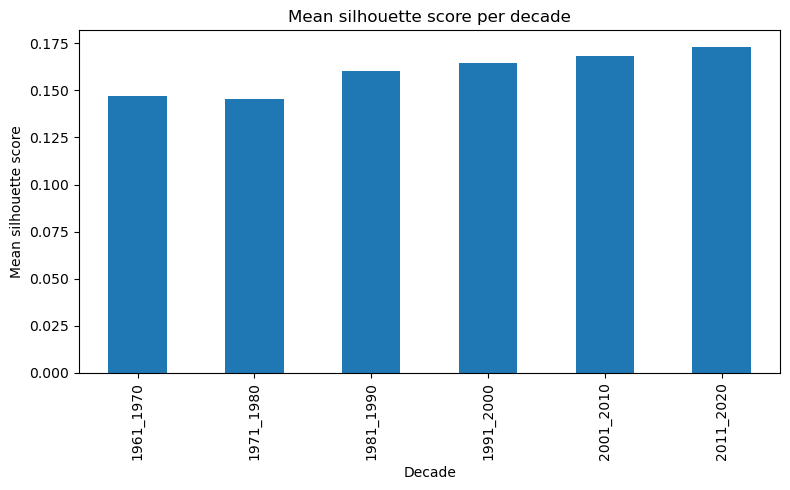

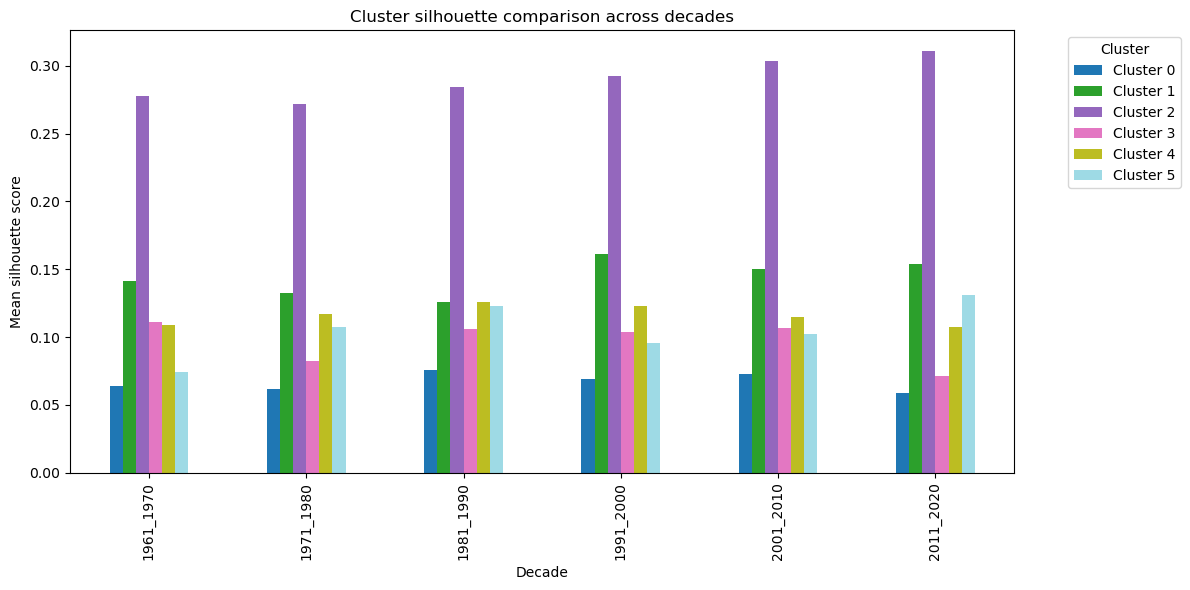

In [12]:
# Mean silhouette 
silhouette_means = []
silhouette_clusters = []

for period in period_names:
    X_pca = np.load(f"Mid_result_to_save/X_pca_{period}.npy")
    labels = np.load(f"Mid_result_to_save/labels_{period}.npy")
    sil_mean = silhouette_score(X_pca, labels)
    silhouette_means.append(sil_mean)
    sil_samples = silhouette_samples(X_pca, labels)
    df = pd.DataFrame({'cluster': labels, 'silhouette': sil_samples})
    silhouette_clusters.append(df.groupby('cluster')['silhouette'].mean().values)


df_sil_means = pd.DataFrame({
    'Decade': period_names,
    'Mean Silhouette': silhouette_means
})
print(df_sil_means)

# Tab mean silhouette
df_sil_clusters = pd.DataFrame(silhouette_clusters, columns=[f'Cluster {i}' for i in range(len(silhouette_clusters[0]))])
df_sil_clusters['Decade'] = period_names
df_sil_clusters = df_sil_clusters.set_index('Decade')
print(df_sil_clusters)

# Plot mean silhouette per decade
df_sil_means.set_index('Decade').plot(kind='bar', figsize=(8,5), legend=False)
plt.ylabel('Mean silhouette score')
plt.title('Mean silhouette score per decade')
plt.tight_layout()
plt.show()

# Plot mean silhouette per cluster e decade
df_sil_clusters.plot(kind='bar', figsize=(12,6), colormap='tab20')
plt.ylabel('Mean silhouette score')
plt.title('Cluster silhouette comparison across decades')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()